In this project we will predict the chances of getting a disease in organs like liver, kidey, heart, etc.

The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc). The target is the 'classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease. There are 400 rows

#### Attribute Information:

We use 24 + class = 25 ( 11 numeric ,14 nominal)
- 1.Age(numerical): 
    age in years
- 2.Blood Pressure(numerical): 
    bp in mm/Hg
- 3.Specific Gravity(nominal): 
sg - (1.005,1.010,1.015,1.020,1.025)
- 4.Albumin(nominal): 
al - (0,1,2,3,4,5)
- 5.Sugar(nominal): 
su - (0,1,2,3,4,5)
- 6.Red Blood Cells(nominal): 
rbc - (normal,abnormal)
- 7.Pus Cell (nominal): 
pc - (normal,abnormal)
- 8.Pus Cell clumps(nominal): 
pcc - (present,notpresent)
- 9.Bacteria(nominal): 
ba - (present,notpresent)
- 10.Blood Glucose Random(numerical): 
bgr in mgs/dl
- 11.Blood Urea(numerical): 
bu in mgs/dl
- 12.Serum Creatinine(numerical): 
sc in mgs/dl
- 13.Sodium(numerical): 
sod in mEq/L
- 14.Potassium(numerical): 
pot in mEq/L
- 15.Hemoglobin(numerical): 
hemo in gms
- 16.Packed Cell Volume(numerical): 
- 17.White Blood Cell Count(numerical): 
wc in cells/cumm
- 18.Red Blood Cell Count(numerical): 
rc in millions/cmm
- 19.Hypertension(nominal): 
htn - (yes,no)
- 20.Diabetes Mellitus(nominal): 
dm - (yes,no)
- 21.Coronary Artery Disease(nominal): 
cad - (yes,no)
- 22.Appetite(nominal): 
appet - (good,poor)
- 23.Pedal Edema(nominal): 
pe - (yes,no)
- 24.Anemia(nominal): 
ane - (yes,no)
- 25.Class (nominal): 
class - (ckd,notckd)

The dataset is available at: https://archive.ics.uci.edu/ml/datasets/ChronicKidneyDisease

# Importing the Dependencies

In [27]:
# Importing necessary libraries used for data cleaning, and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Importing library to split the data into training part and testing part.
from sklearn.model_selection import train_test_split

# Importing library to process the data (Normalize the data)
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Importing Models (used for making prediction)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm                            # Support vector machine model 
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# Importing metrics used for evaluation of our models
from sklearn import metrics
from sklearn.metrics import classification_report

In [28]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
pd.set_option('display.max_columns',29)

# Data Collection

In [29]:
df = pd.read_csv("kidney.csv")

In [30]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [31]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,1.1,141.0,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


**Observations:**
- "classification" column is our target feature. "id" column has no use in prediction part so we will remove it(later but before prediction).

# Exploratory Data Analysis (EDA)

In [32]:
# Checking the number of rows and columns in our dataset
df.shape

(400, 26)

- Dataset contains 195 rows and 24 columns

In [33]:
# Getting more information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

**Observations:**
- Seems there are some null values. We will remove it but before removing we will check null values by another technique.
- Also dtype of many columns are wrong. For ex. pcv column should have dtype of int instead of object.

In [34]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

**Observations:**
- There are many null values in our dataset. We will replace null values in Data Preprocessing part.

In [35]:
# Getting some statistical information of our data
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [36]:
# Distribution of our target variable i.e. "classification" column
df["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [37]:
for i in df.drop("id",axis=1).columns:
    print('Unique Values in "{}":\n'.format(i),df[i].unique(), "\n\n")

Unique Values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 


Unique Values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 


Unique Values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025] 


Unique Values in "al":
 [ 1.  4.  2.  3.  0. nan  5.] 


Unique Values in "su":
 [ 0.  3.  4.  1. nan  2.  5.] 


Unique Values in "rbc":
 [nan 'normal' 'abnormal'] 


Unique Values in "pc":
 ['normal' 'abnormal' nan] 


Unique Values in "pcc":
 ['notpresent' 'present' nan] 


Unique Values in "ba":
 ['notpresent' 'present' nan] 


Unique Values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 17

**Observations:**
- Data cleaning much needed as there is \t after a word. 
- For ex. Classification should be only ckd or notckd but there is one extra variable i.e. ckd\t. It should be actually ckd. Hence Data Cleaning much needed.

- Columns from where we have to remove "\t" is: pcv, wc, rc, dm, cad, classification

# Data Cleaning

## Replacing "\t"

In [38]:
df[['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']] = df[['pcv', 'wc', 'rc', 'dm', 'cad', 'classification']].replace(to_replace={'\t8400':'8400', '\t6200':'6200', '\t43':'43', '\t?':np.nan, '\tyes':'yes', '\tno':'no', 'ckd\t':'ckd', ' yes':'yes'})

- Let's check still if there any "\t" in our data

In [39]:
for i in df.drop("id",axis=1).columns:
    print('Unique Values in "{}":\n'.format(i),df[i].unique(), "\n\n")

Unique Values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 


Unique Values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 


Unique Values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025] 


Unique Values in "al":
 [ 1.  4.  2.  3.  0. nan  5.] 


Unique Values in "su":
 [ 0.  3.  4.  1. nan  2.  5.] 


Unique Values in "rbc":
 [nan 'normal' 'abnormal'] 


Unique Values in "pc":
 ['normal' 'abnormal' nan] 


Unique Values in "pcc":
 ['notpresent' 'present' nan] 


Unique Values in "ba":
 ['notpresent' 'present' nan] 


Unique Values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 17

**Observations:**
- Seems all "\t" removed from our data.
- Now let's handle null values.

## Handling Null Values

- Lets check null values in form of a graph first

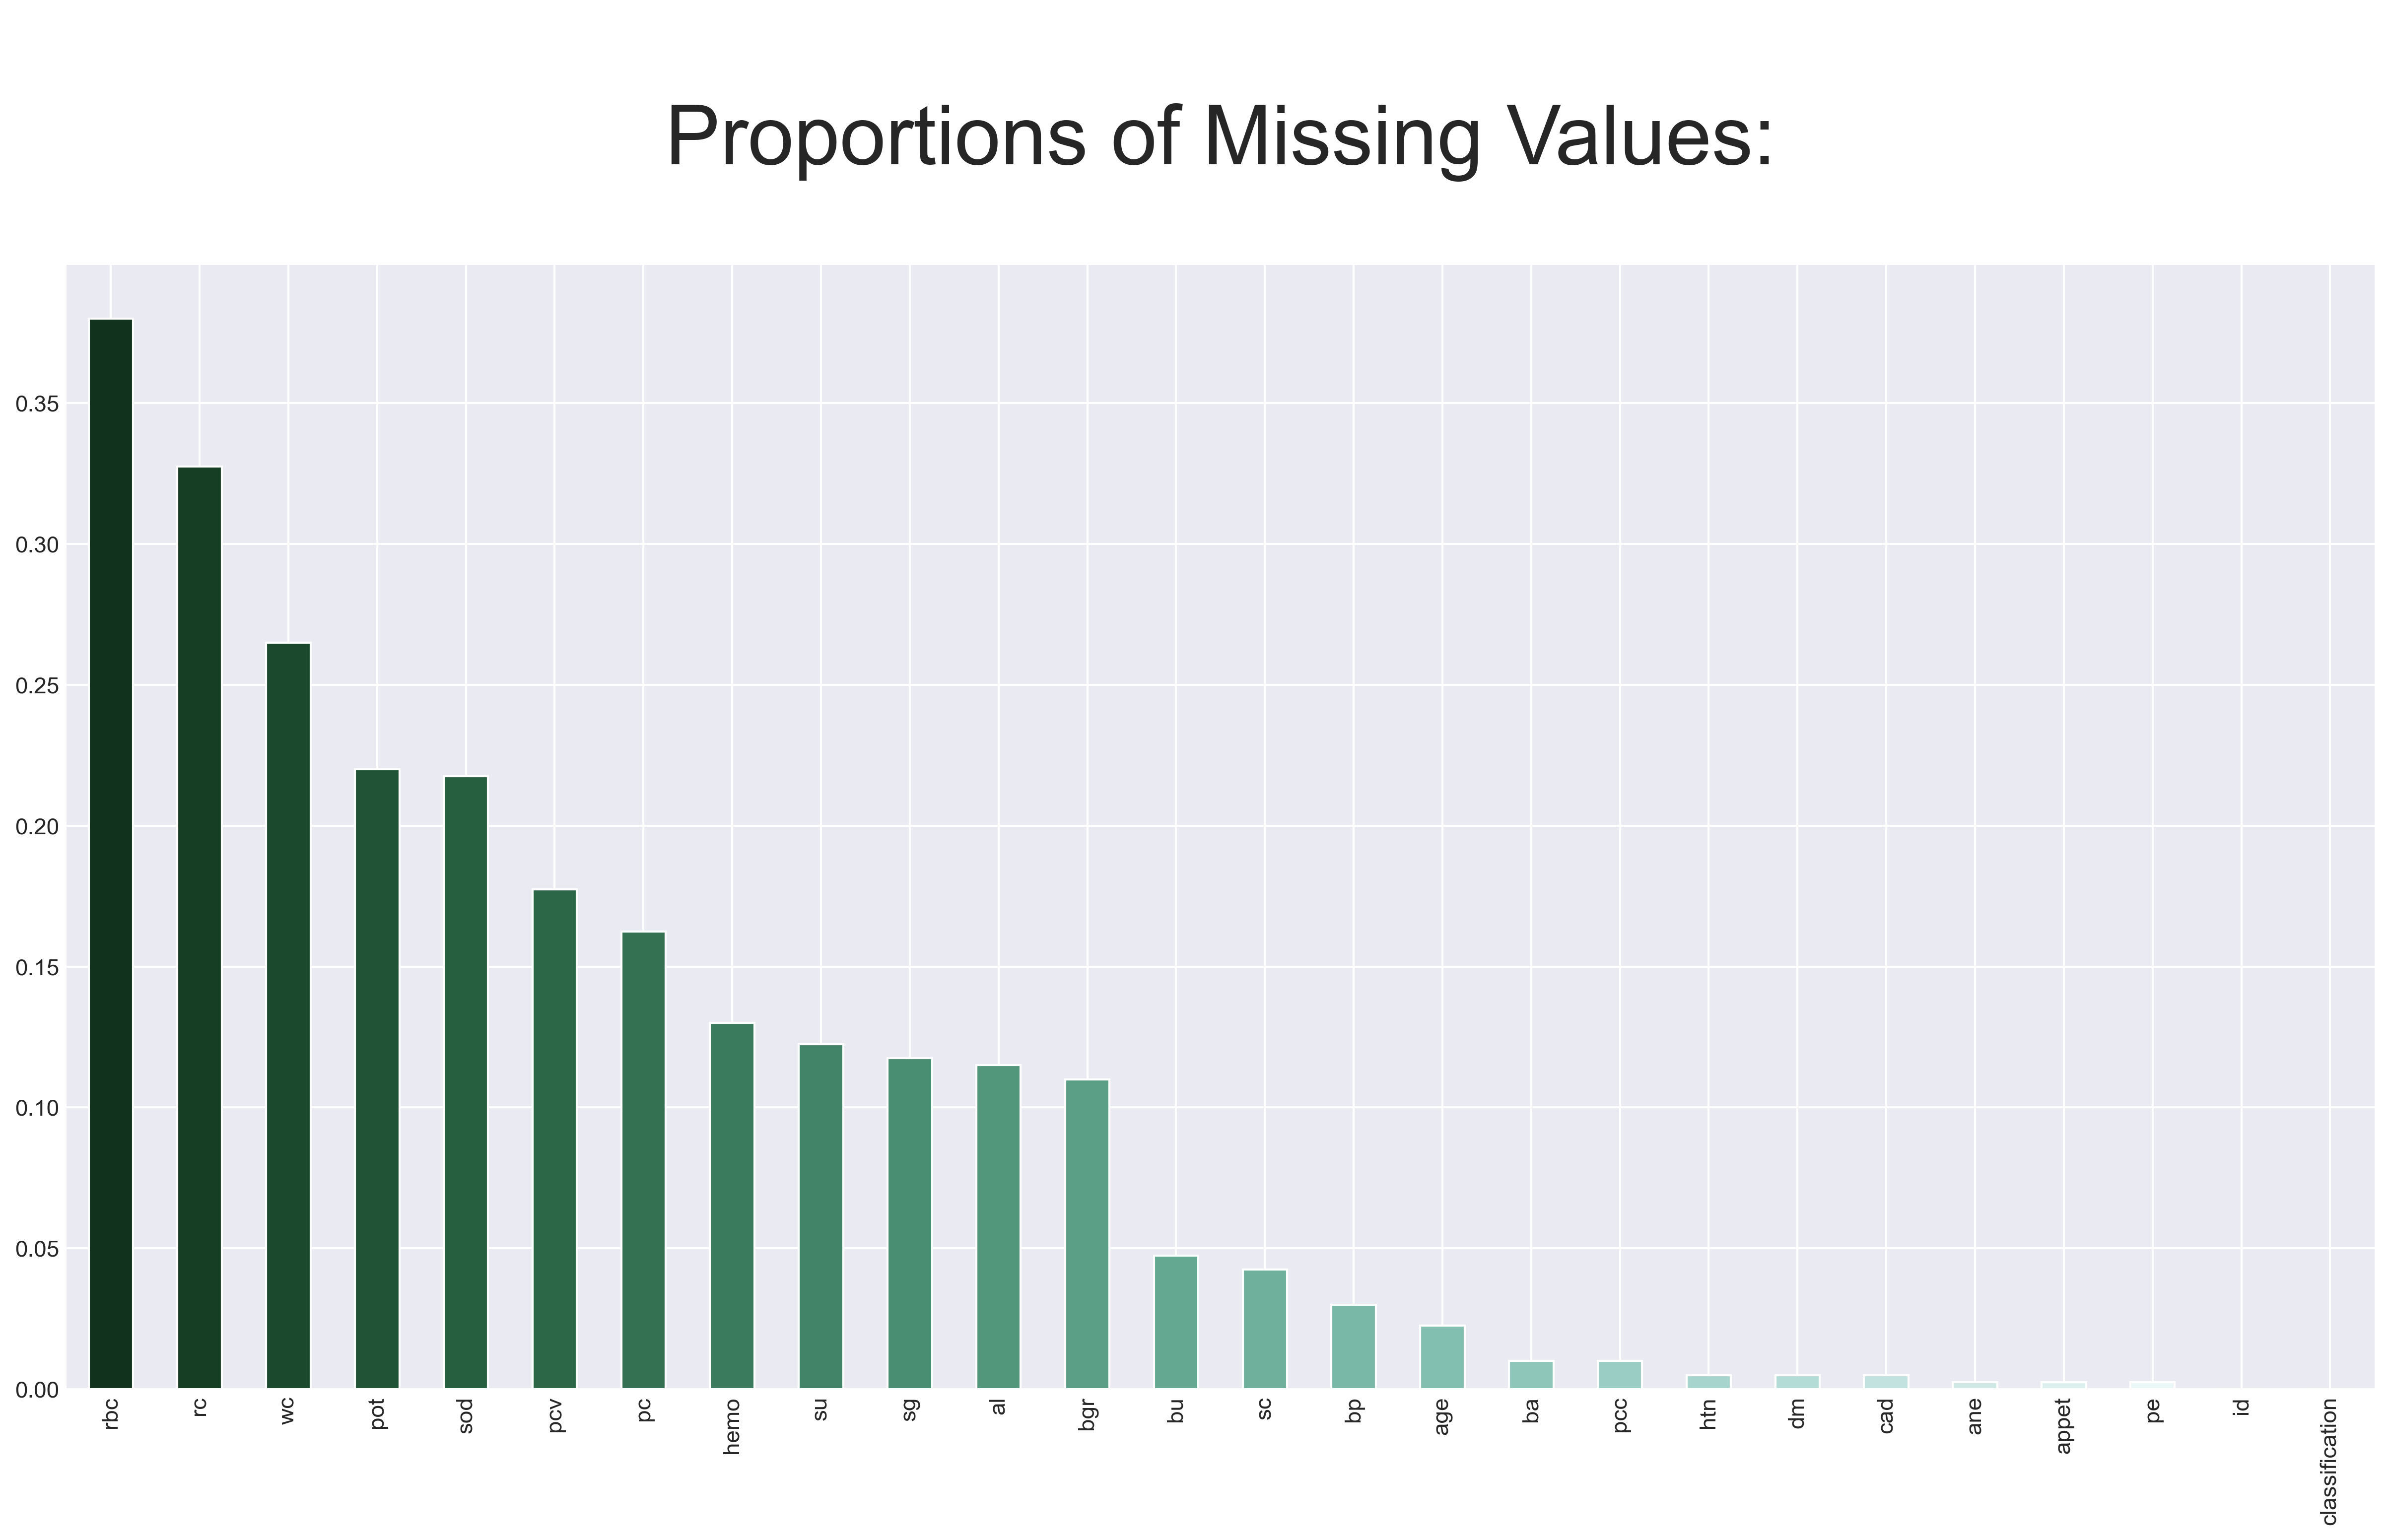

In [40]:
style.use('seaborn-darkgrid')

d=((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

**Observations:**
- From this graph we can observe that rbc column have highest null values followed by rc, wc, etc.

In [41]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

- All null values are replaced by using forward fill method and backward fill method.

## Handling Dtypes

In [42]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [43]:
for i in df.columns:
    print('Unique Values in "{}":\n'.format(i),df[i].unique(), "\n\n")

Unique Values in "id":
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 24

**Observations:**
- pcv, wc, and rc column should have dtype of float as it contains all integer but it is of object type. We have to correct this.

In [44]:
df[['pcv', 'wc', 'rc']] = df[['pcv', 'wc', 'rc']].astype('float64')
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [45]:
display(df['pcv'].unique())
display(df['wc'].unique())
display(df['rc'].unique())

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., 16., 24., 37.,
       30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17., 46.,
       23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49., 50.,
       53., 51., 54.])

array([ 7800.,  6000.,  7500.,  6700.,  7300.,  6900.,  9600., 12100.,
        4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,  6200.,
        8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,  8600.,
       18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700., 14600.,
        6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200., 12500.,
        5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,  6500.,
       13600., 10200.,  9000., 14900.,  8200., 15200.,  5000., 16300.,
       12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,  2200.,
       12800., 11200., 19100., 12300., 16700.,  2600., 26400.,  8800.,
        7400.,  4900.,  8000., 12000., 15700.,  4100.,  5700., 11500.,
        5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,  5100.,
        6600.])

array([5.2, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3, 3.2,
       3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6, 2.3,
       2.9, 2.7, 8. , 3.3, 3. , 2.4, 4.8, 5.4, 6.1, 6.2, 6.3, 5.1, 5.8,
       5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

- Yipee! We have changed dtypes successfully.

## Dropping unnecessary columns

- id column is not required for our data analysis as it is not providing any info which will be useful in making prediction.

In [46]:
df.drop('id',axis=1,inplace=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,111.0,2.5,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,0.8,111.0,2.5,11.3,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,111.0,2.5,9.6,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,111.0,2.5,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


# Data Visualization

- Seperating numerical columns and categorical columns for easy data visualization code implementation

<AxesSubplot:xlabel='classification', ylabel='count'>

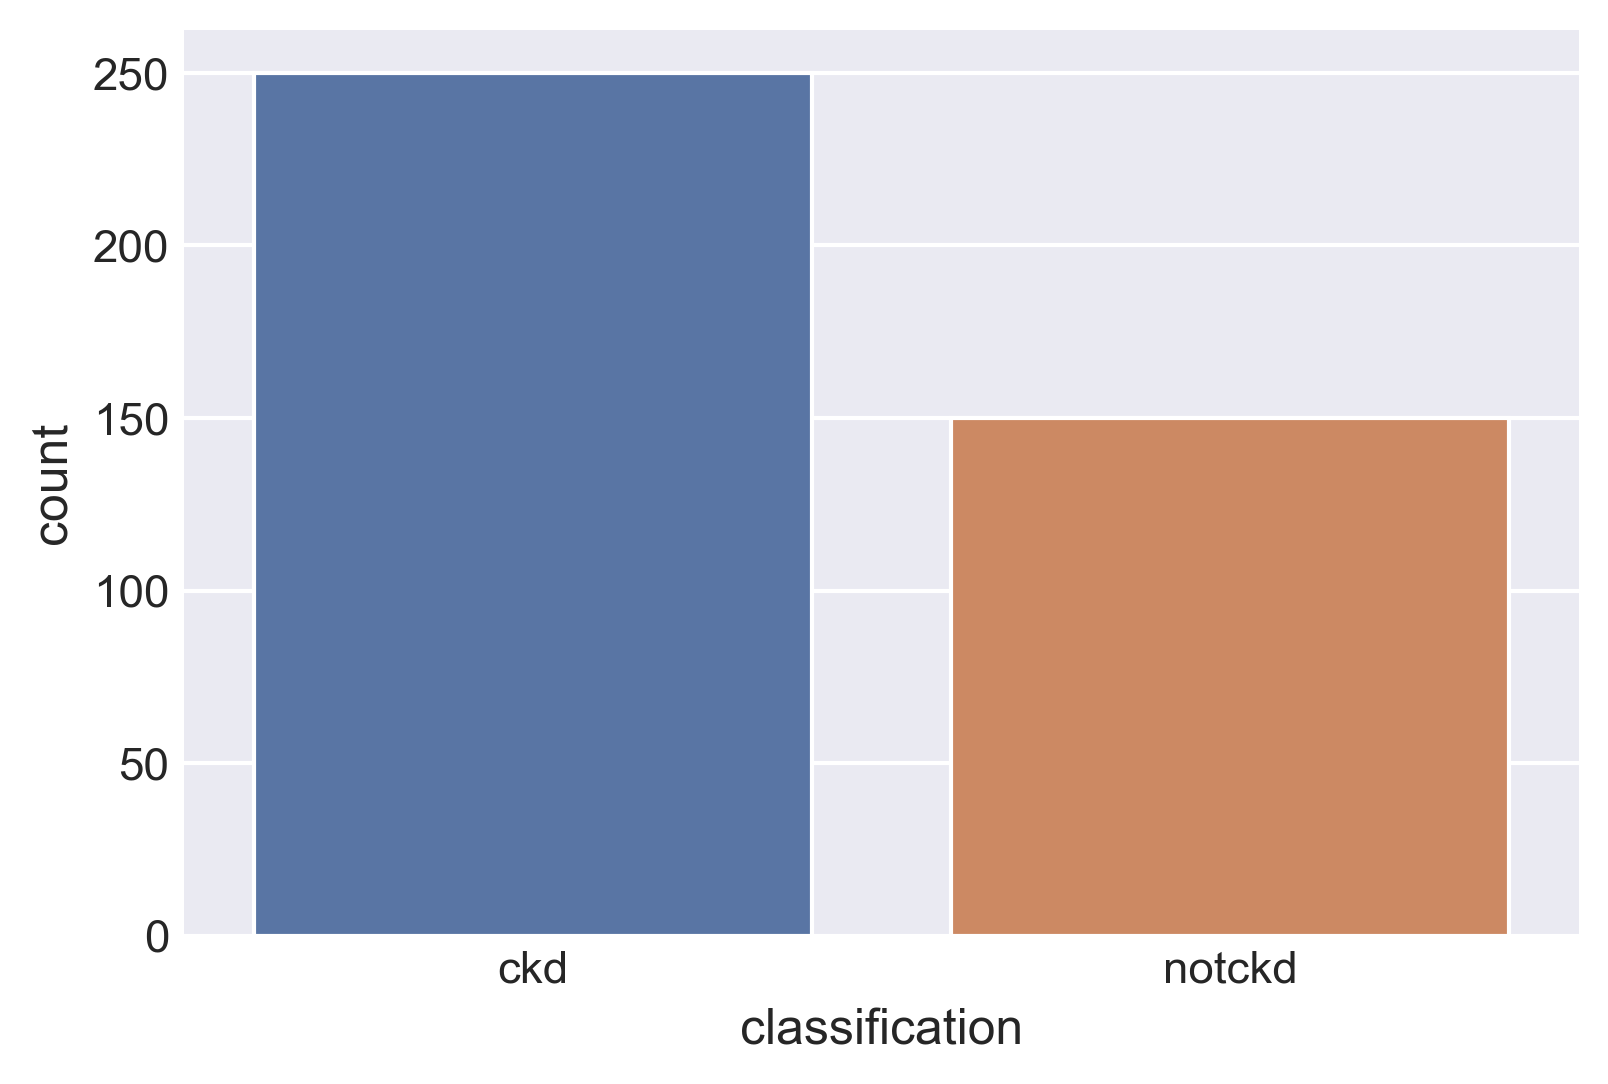

In [47]:
sns.countplot(x = "classification", data = df)

<AxesSubplot:>

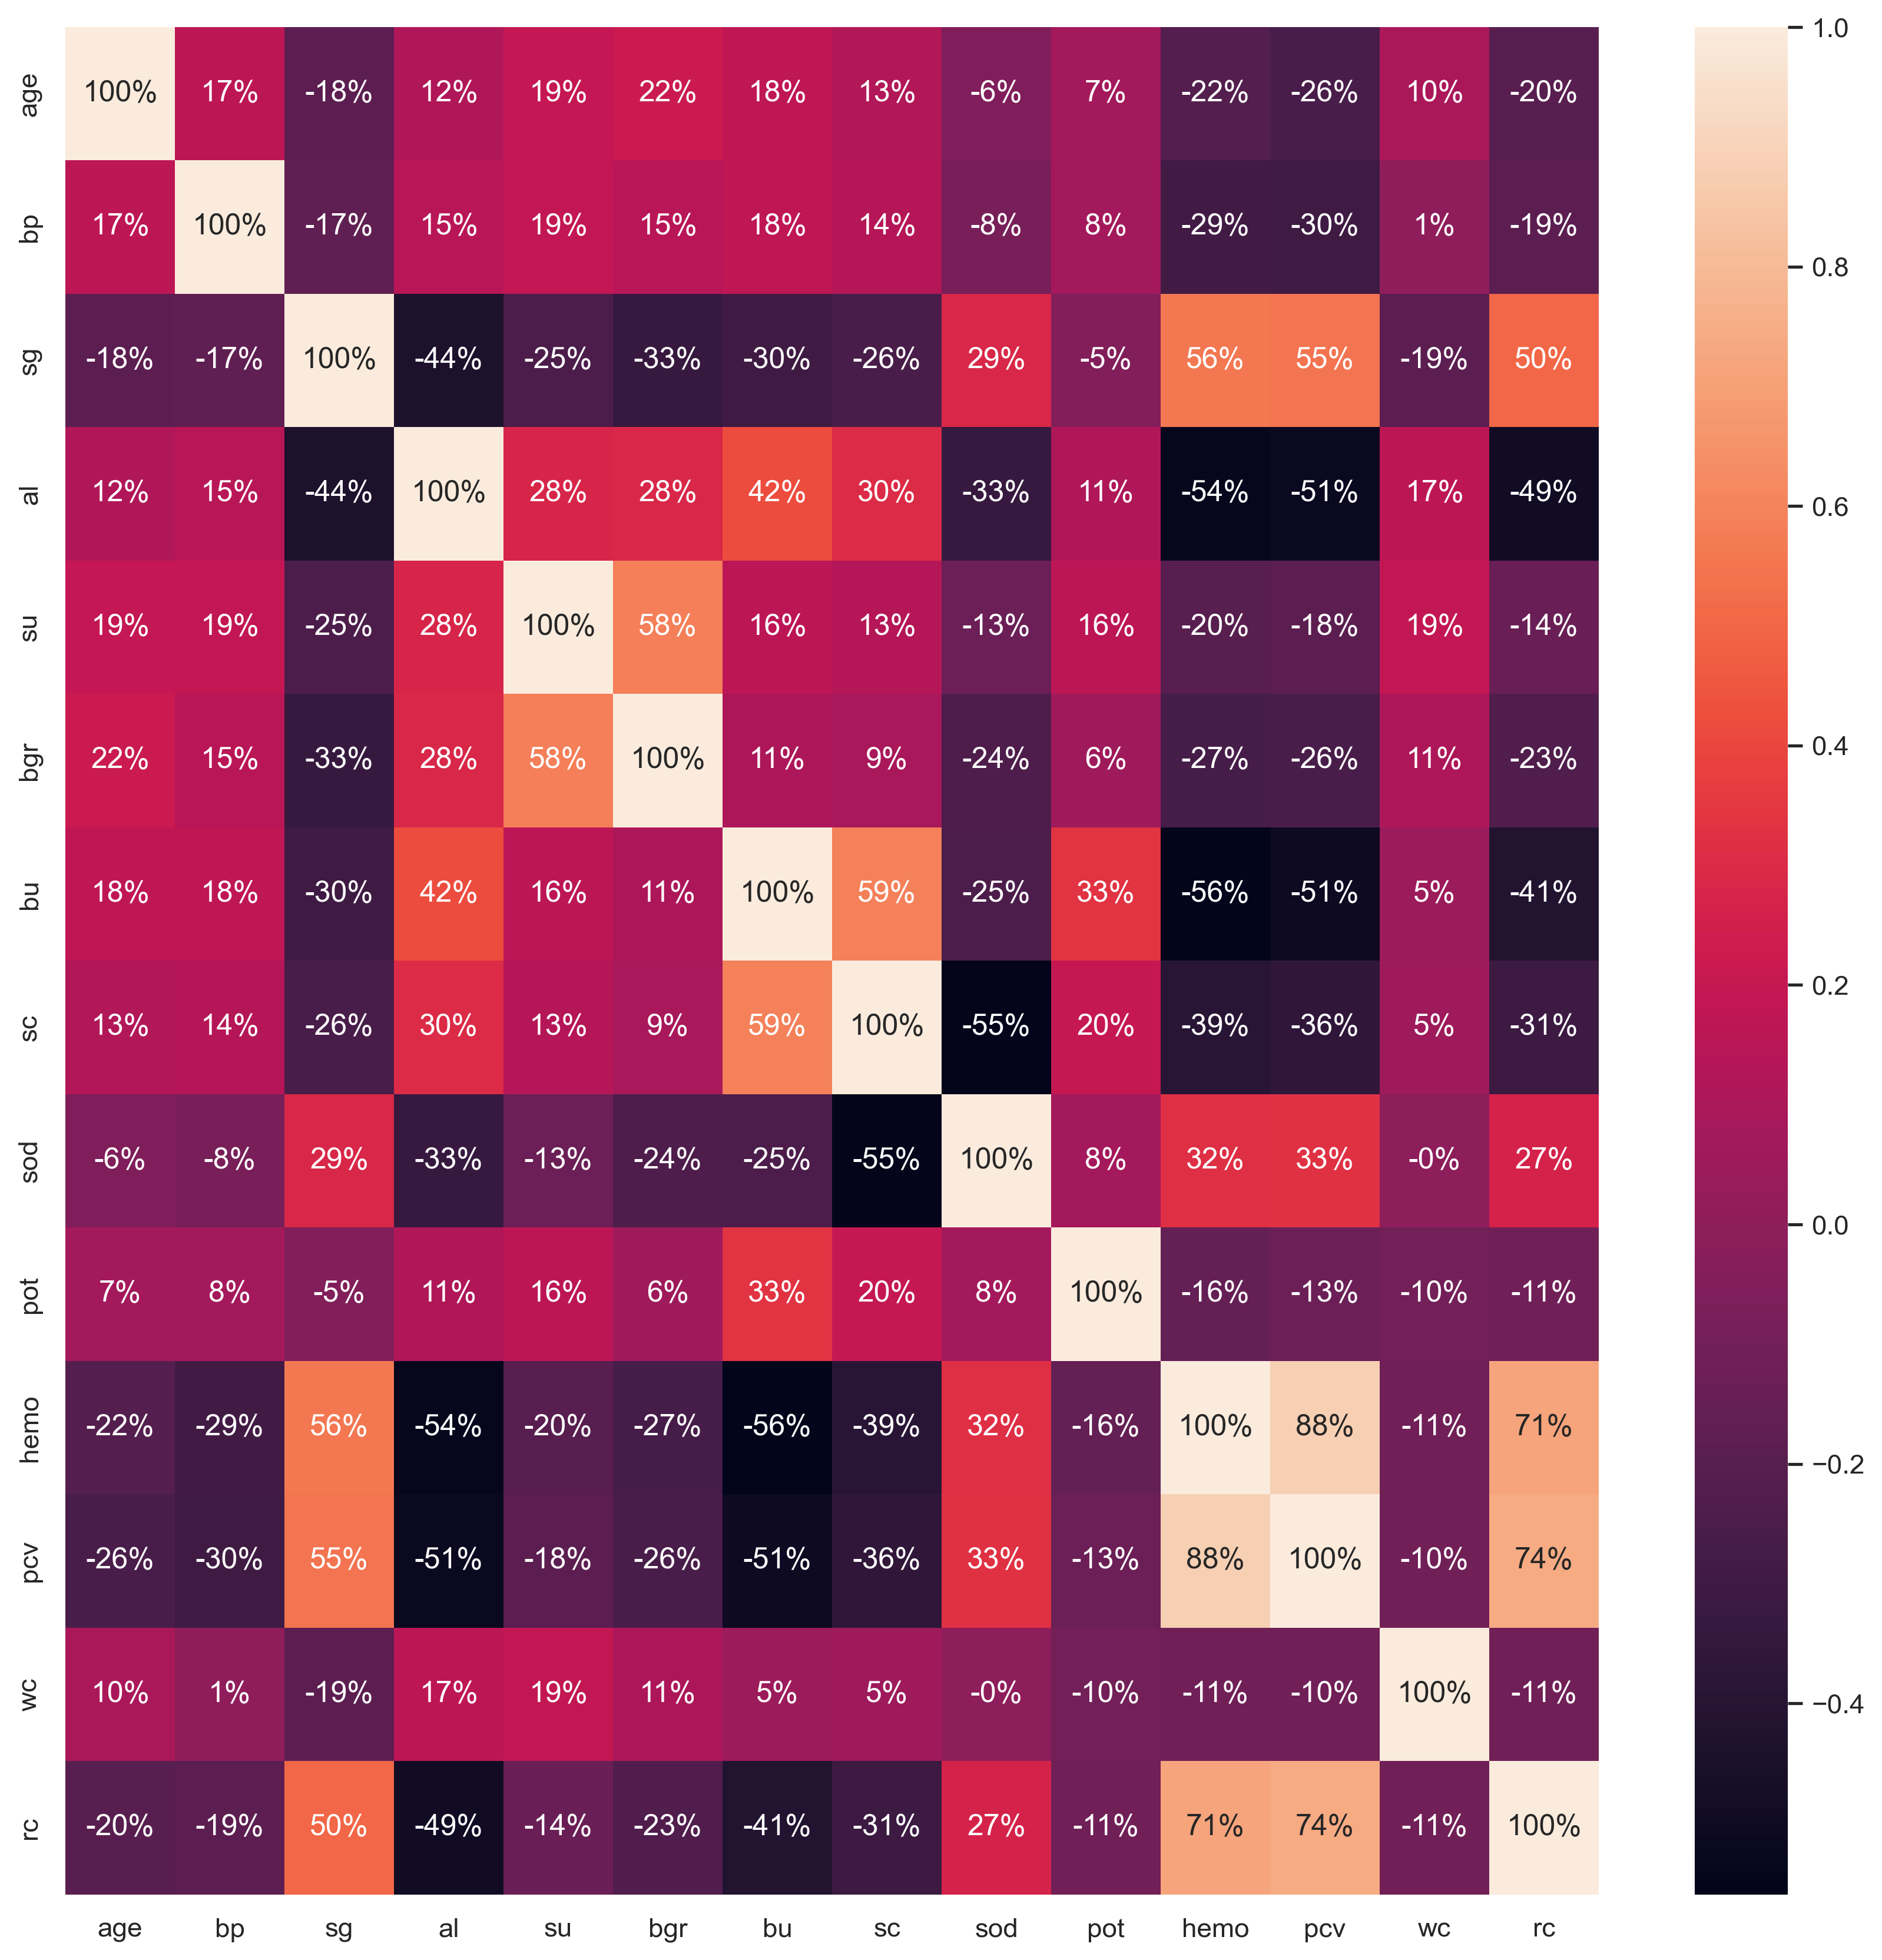

In [48]:
sns.set(font_scale=1.0)
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt = '.0%')

# Label Encoding

- Label encoding will convert all categorical column with object as dtype to int64 as dtype. Example: Yes or No to 1 or 0.

In [49]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [50]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,111.0,2.5,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,0.8,111.0,2.5,11.3,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,111.0,2.5,9.6,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,111.0,2.5,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [51]:
col = ['rbc', 'pcc', 'pc', 'ba', 'htn', 'dm', 'cad', 'pe', 'ane']
encoder = LabelEncoder()
for col in col:
    df[col] = encoder.fit_transform(df[col])

In [52]:
df[['appet', 'classification']] = df[['appet', 'classification']].replace(to_replace={'good':'1', 'ckd':'1', 'notckd':'0', 'poor':'0'})

In [53]:
df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,1,1,0,0,121.0,36.0,1.2,111.0,2.5,15.4,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,7.0,50.0,1.02,4.0,0.0,1,1,0,0,121.0,18.0,0.8,111.0,2.5,11.3,38.0,6000.0,5.2,0,0,0,1,0,0,1


In [54]:
df[['classification', 'appet']] = df[['classification', 'appet']].astype('int64')

**Observations:**
- We converted all object categorical to int categorical, it will surely increase the performance of our model.
- We will also standardise the scale of our data by using MinMaxScaler. This will help in increasing the performance of the model and increasing accuracy.
- Here, present = 1, normal = 1, yes = 1, notpresent = 0, abnormal = 0, no = 0, good = 1 , poor = 0, ckd = 1, notckd = 0.

# Seperating target feature

In [55]:
X = df.drop("classification", axis=1)
y = df["classification"]
display(X)
display(y)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,111.0,2.5,15.4,44.0,7800.0,5.2,1,1,0,1,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,111.0,2.5,11.3,38.0,6000.0,5.2,0,0,0,1,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,111.0,2.5,9.6,31.0,7500.0,5.2,0,1,0,0,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,0,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,111.0,2.5,11.6,35.0,7300.0,4.6,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,1,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,1,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,1,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,1,0,0


0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

# Standardization of the data

In [56]:
scaler = MinMaxScaler()
features = scaler.fit_transform(X)
features

array([[0.52272727, 0.23076923, 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [0.05681818, 0.        , 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [0.68181818, 0.23076923, 0.25      , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.11363636, 0.23076923, 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [0.17045455, 0.07692308, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.63636364, 0.23076923, 1.        , ..., 1.        , 0.        ,
        0.        ]])

# Splitting the data into train and test data

In [57]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42) 

# Making a Model

## Logistic Regression

In [58]:
lr =LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print(classification_report(y_test, y_pred_lr))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:",metrics.precision_score(y_test, y_pred_lr))
print("Recall:",metrics.recall_score(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Accuracy: 0.9916666666666667
Precision: 1.0
Recall: 0.9868421052631579


- **Accuracy** = Proportion of correct prediction over total prediction
- **Recall** = Out of actual positive(True positive + False negative), how many are True positive
- **Precision** = Out of predicted positive (true positive + False positive), how many are True positive

In [59]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.9857142857142858
0.9916666666666667


**Observations:**
Model isn't overfitting as well as not underfitting.

### Confusion matrix of Logistic Regression Model

<AxesSubplot:>

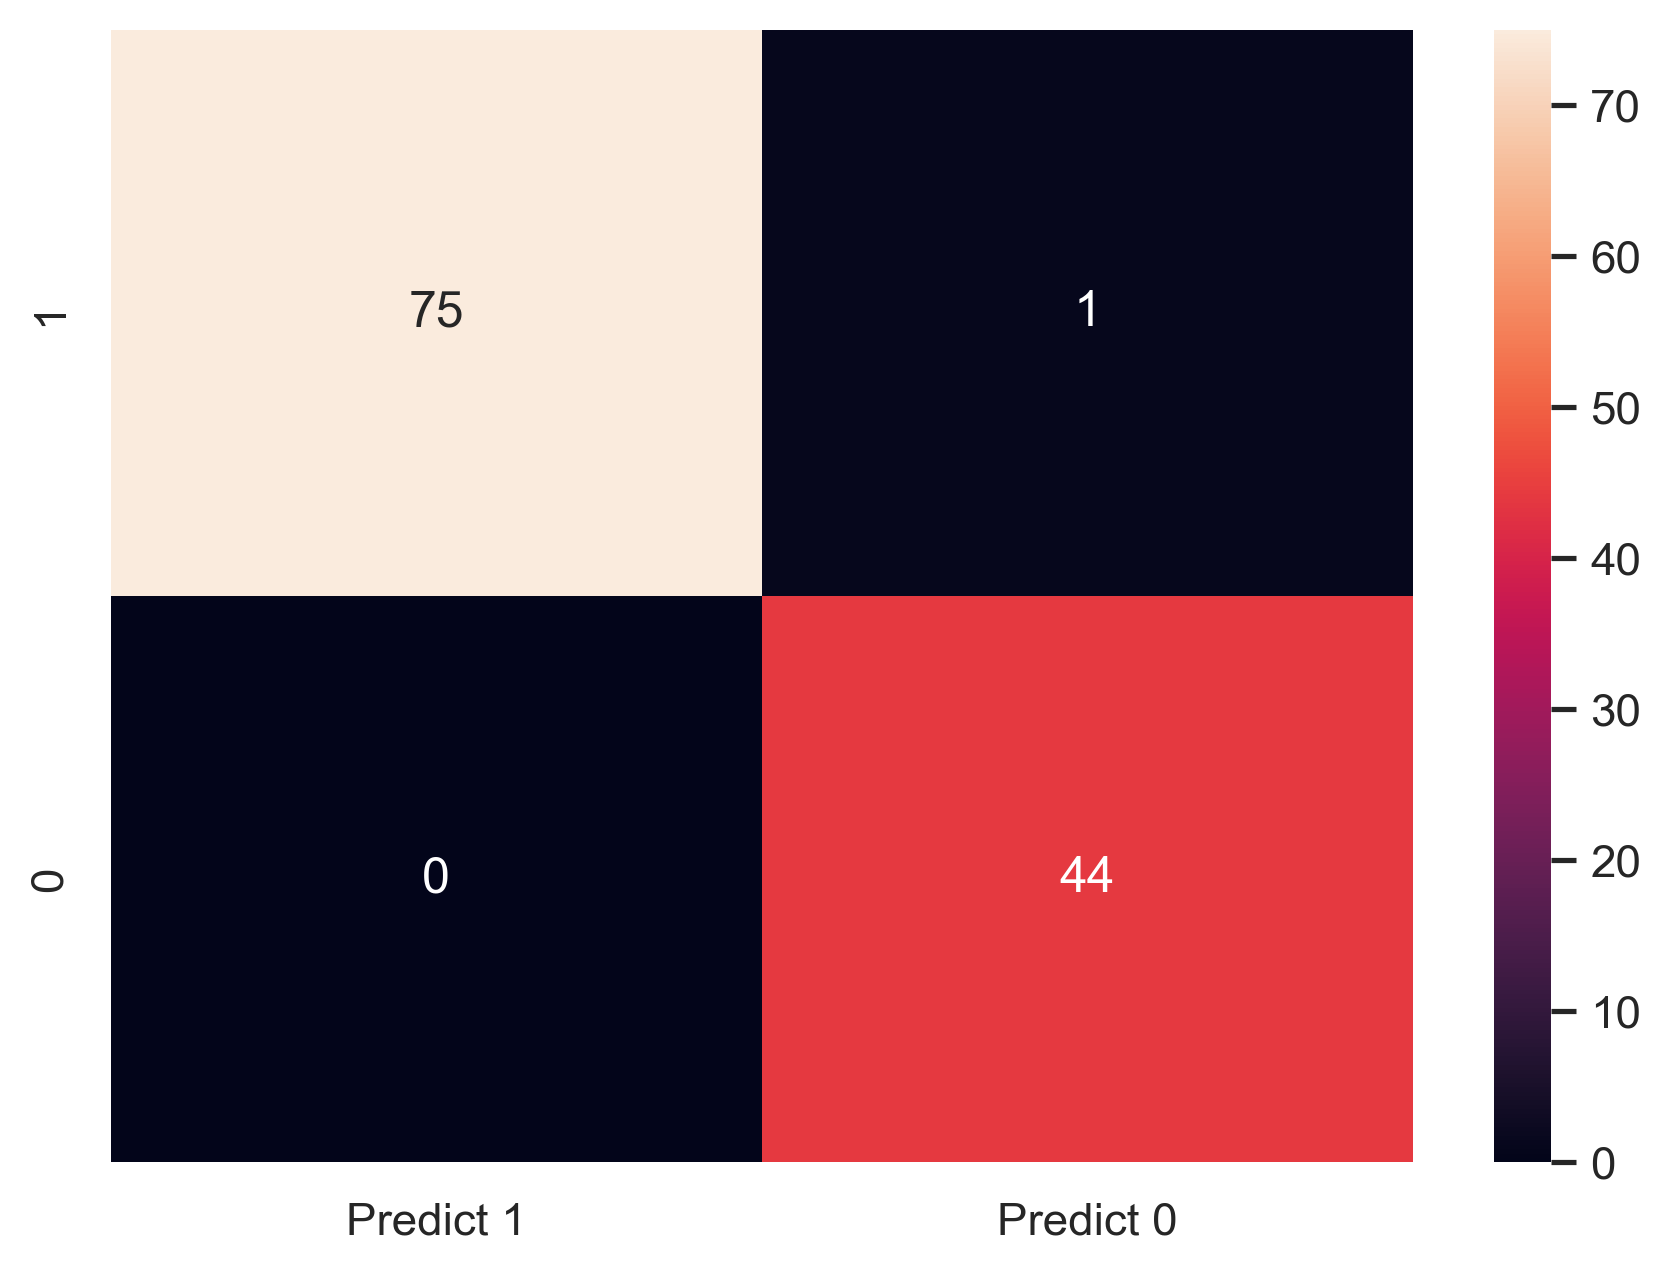

In [60]:
cm = metrics.confusion_matrix(y_test, y_pred_lr, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Logistic Regression Model

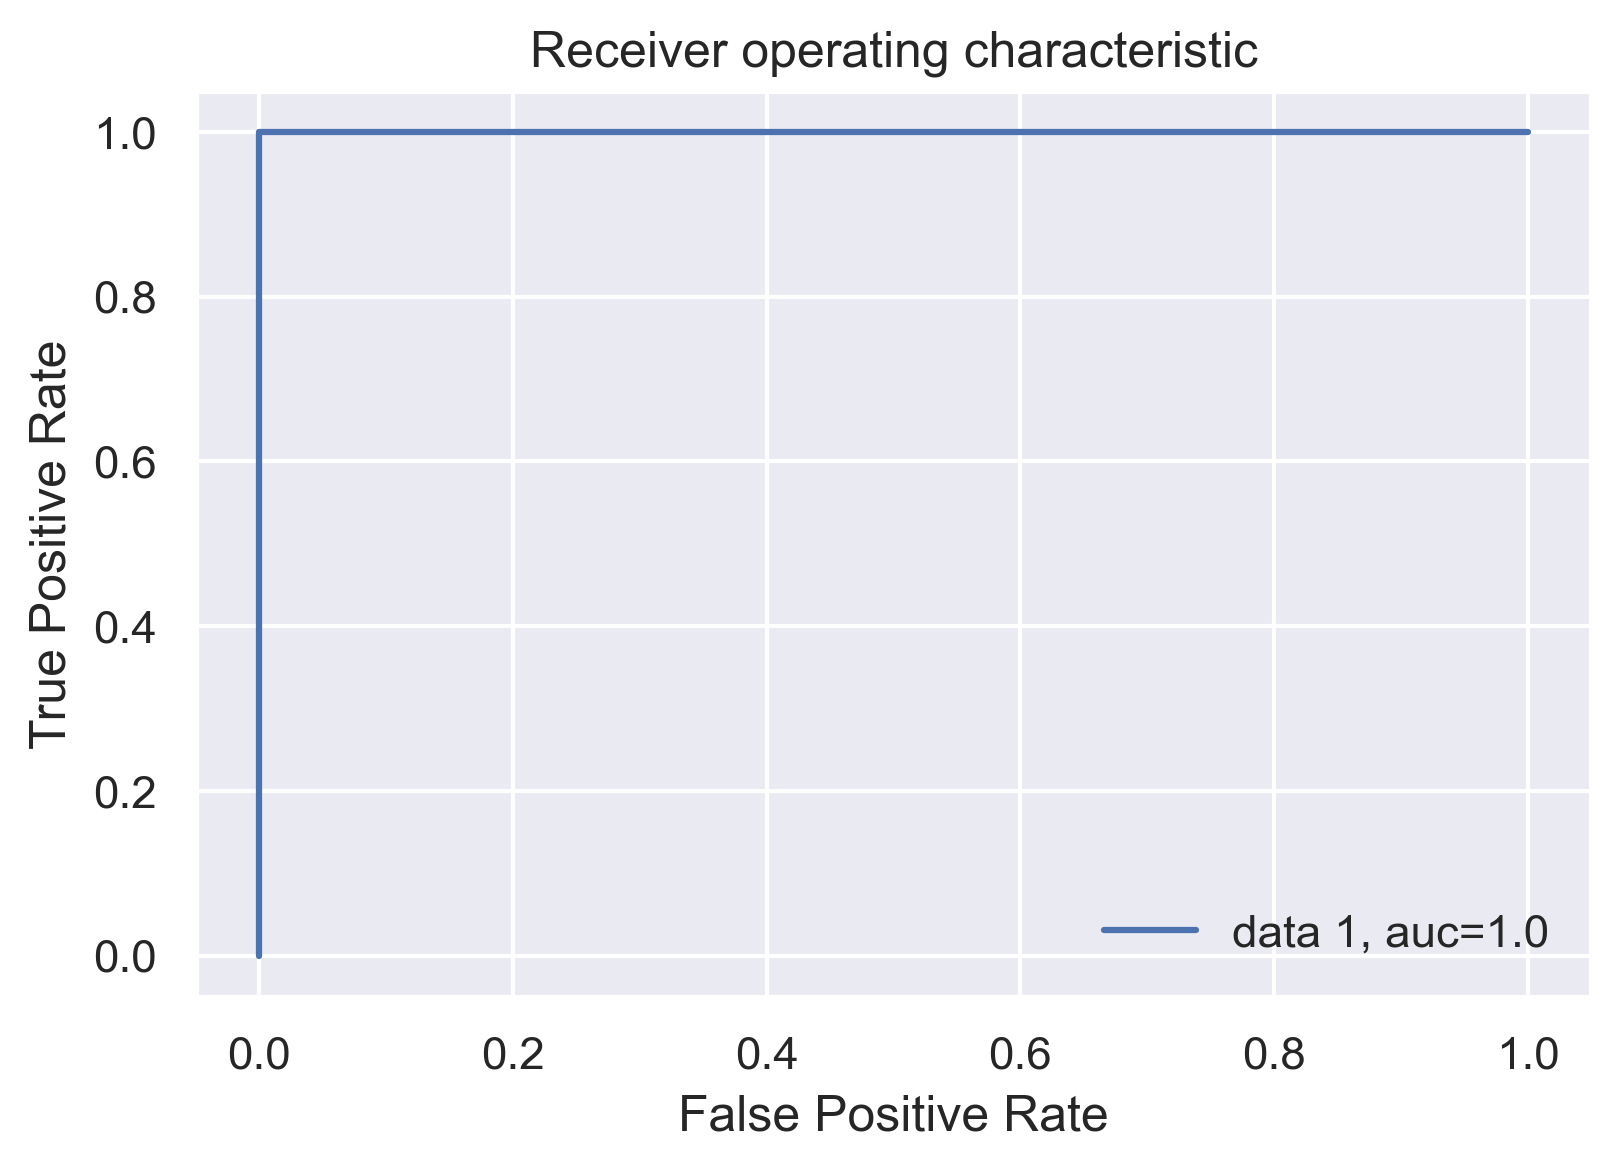

In [61]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## Decision Tree Classifier

In [62]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

print(classification_report(y_test, y_pred_dt))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Accuracy: 0.9916666666666667
Precision: 1.0
Recall: 0.9868421052631579


In [63]:
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

1.0
0.9916666666666667


### Confusion Matrix of Decision Tree Classifier

<AxesSubplot:>

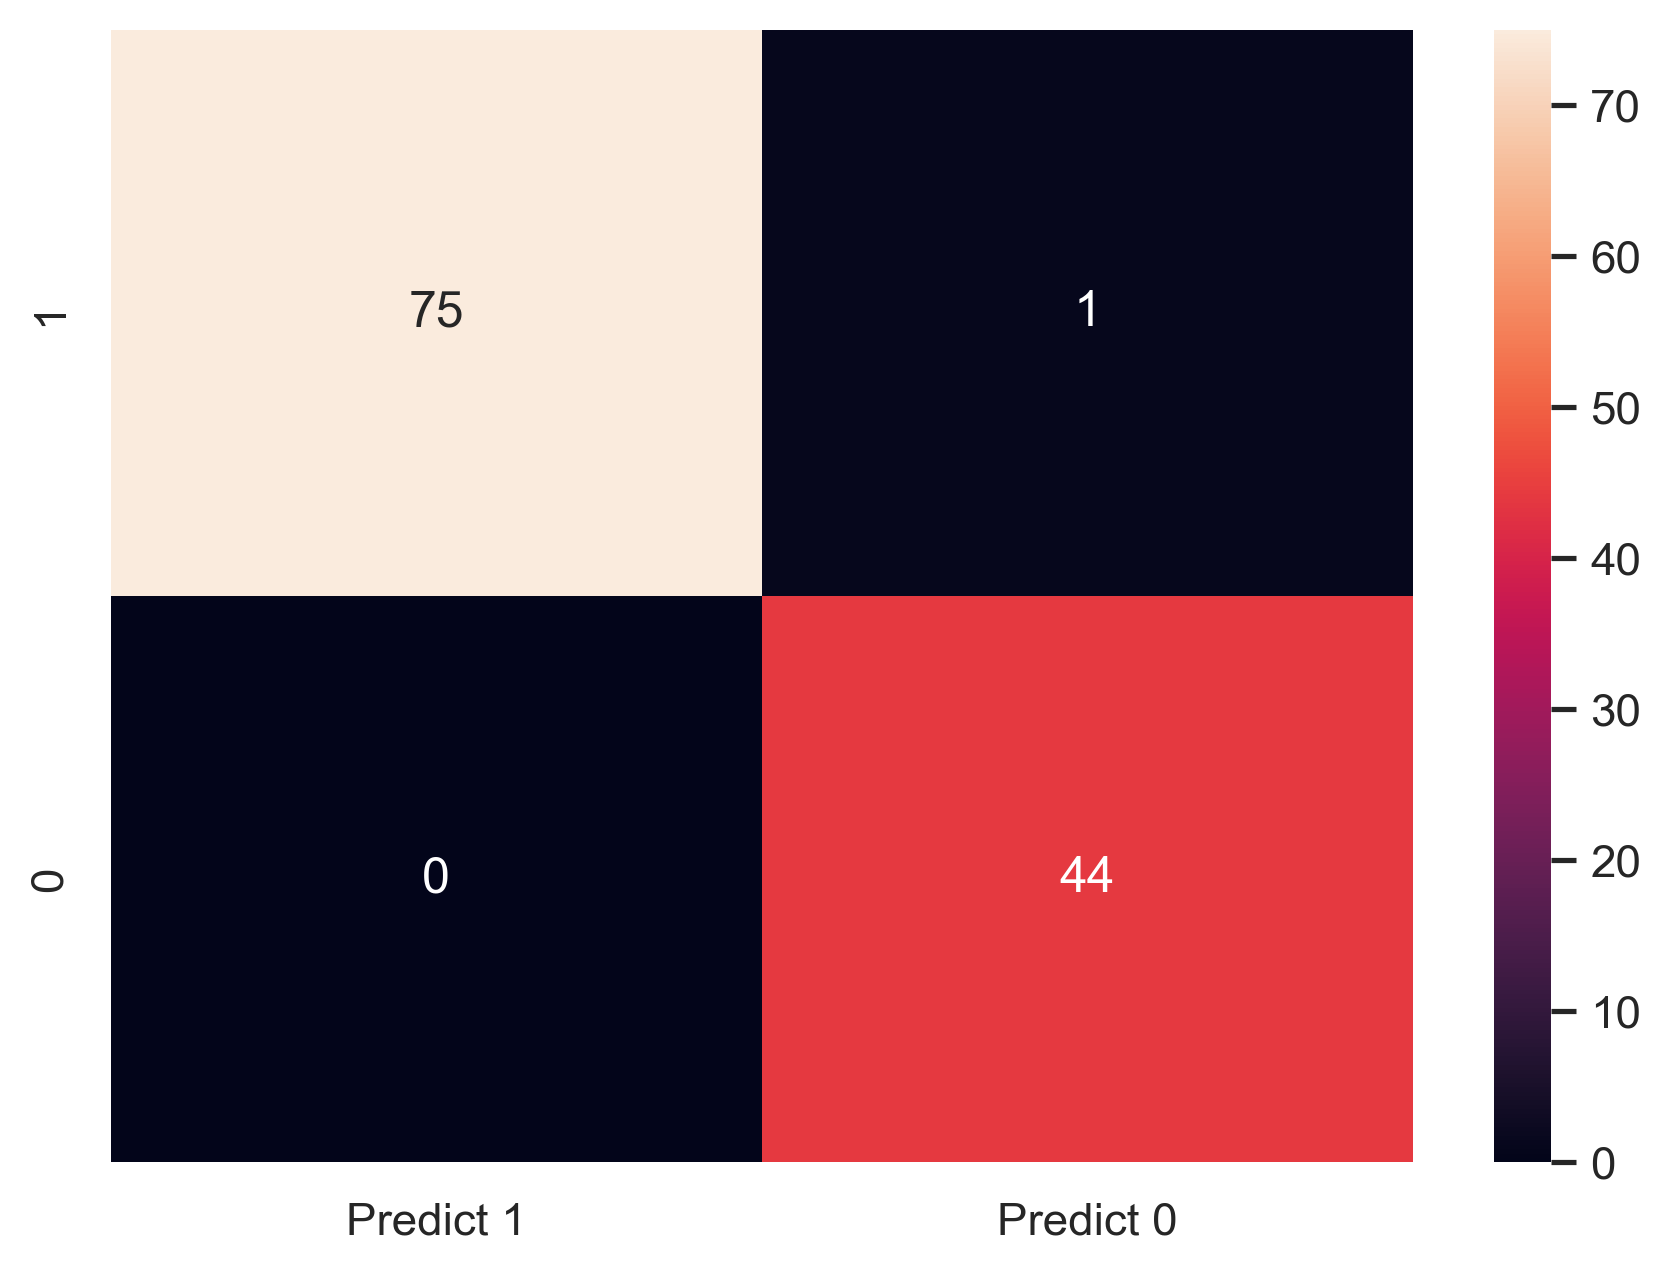

In [64]:
cm = metrics.confusion_matrix(y_test, y_pred_dt, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of DecisionTree Model

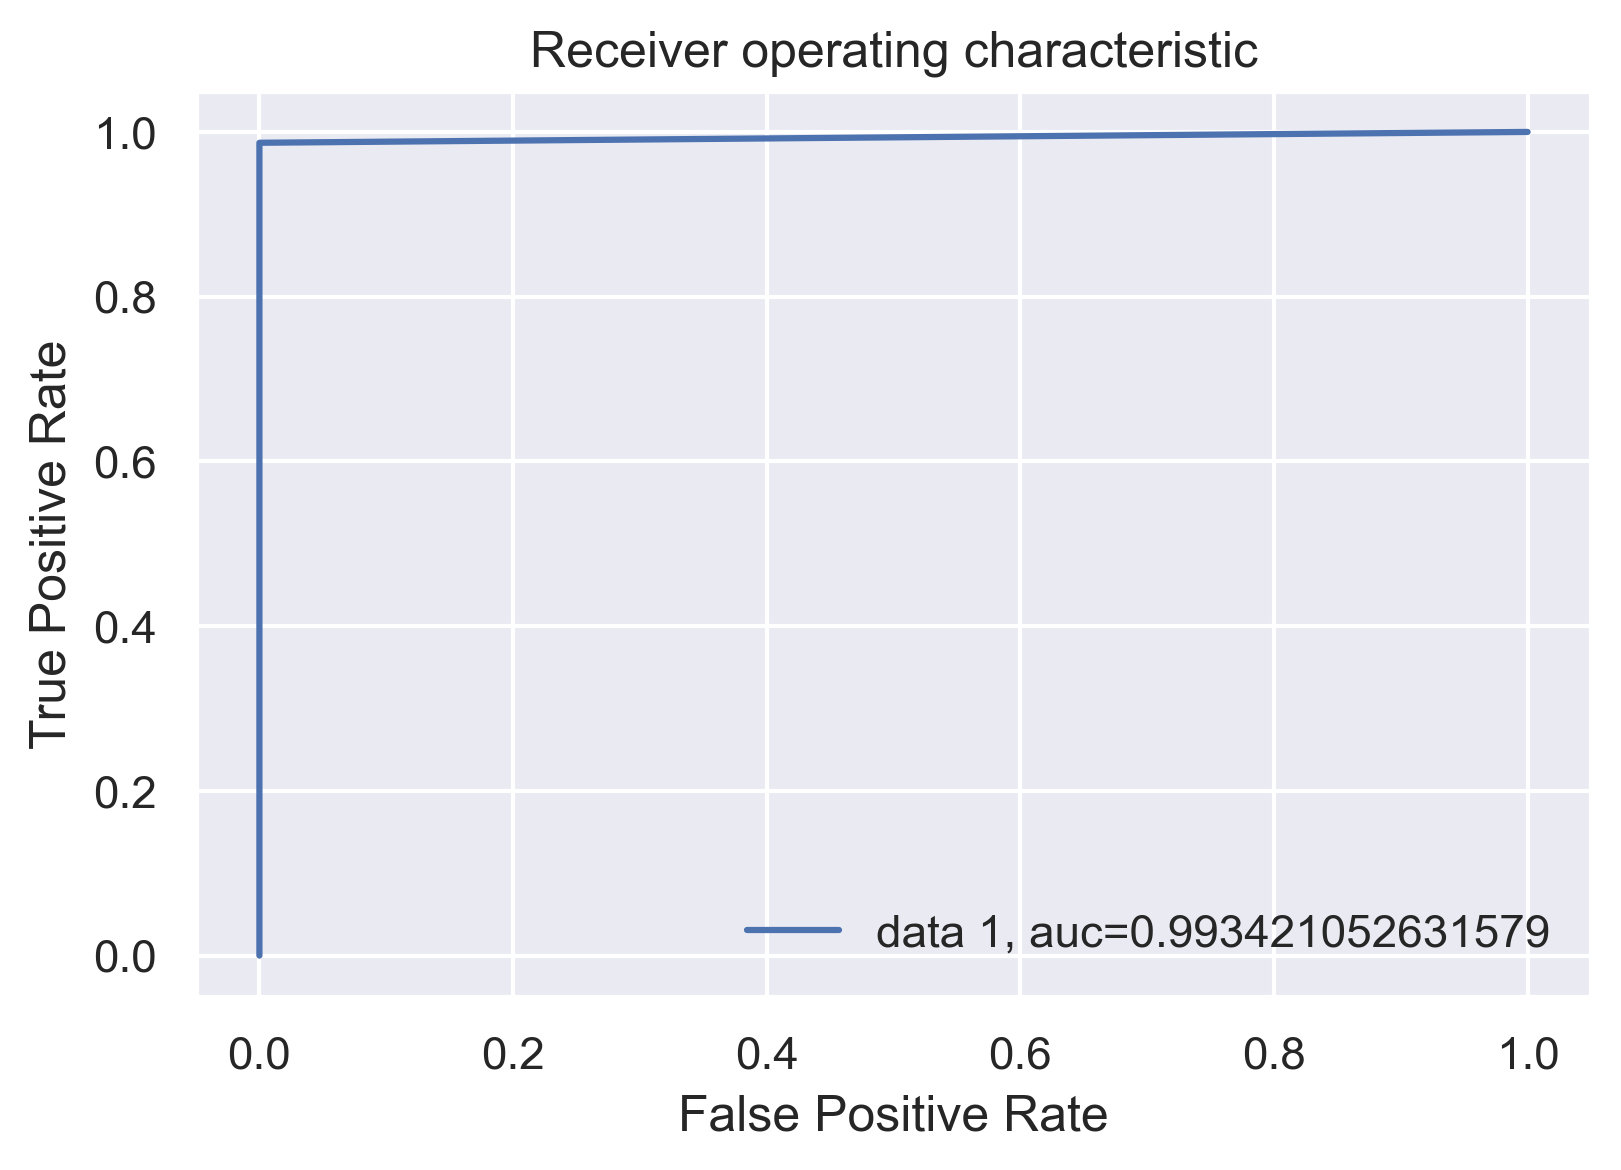

In [65]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## Ensemble learning - Bagging

In [66]:
bgcl = BaggingClassifier(n_estimators = 100, base_estimator=dt, random_state=42)

bgcl = bgcl.fit(x_train, y_train)
y_pred_bgcl = bgcl.predict(x_test)

print(classification_report(y_test, y_pred_bgcl))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_bgcl))
print("Precision:",metrics.precision_score(y_test, y_pred_bgcl))
print("Recall:",metrics.recall_score(y_test, y_pred_bgcl))

print("\n")
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Accuracy: 0.9916666666666667
Precision: 1.0
Recall: 0.9868421052631579


1.0
0.9916666666666667


### Confusion Matrix of Bagging Model

<AxesSubplot:>

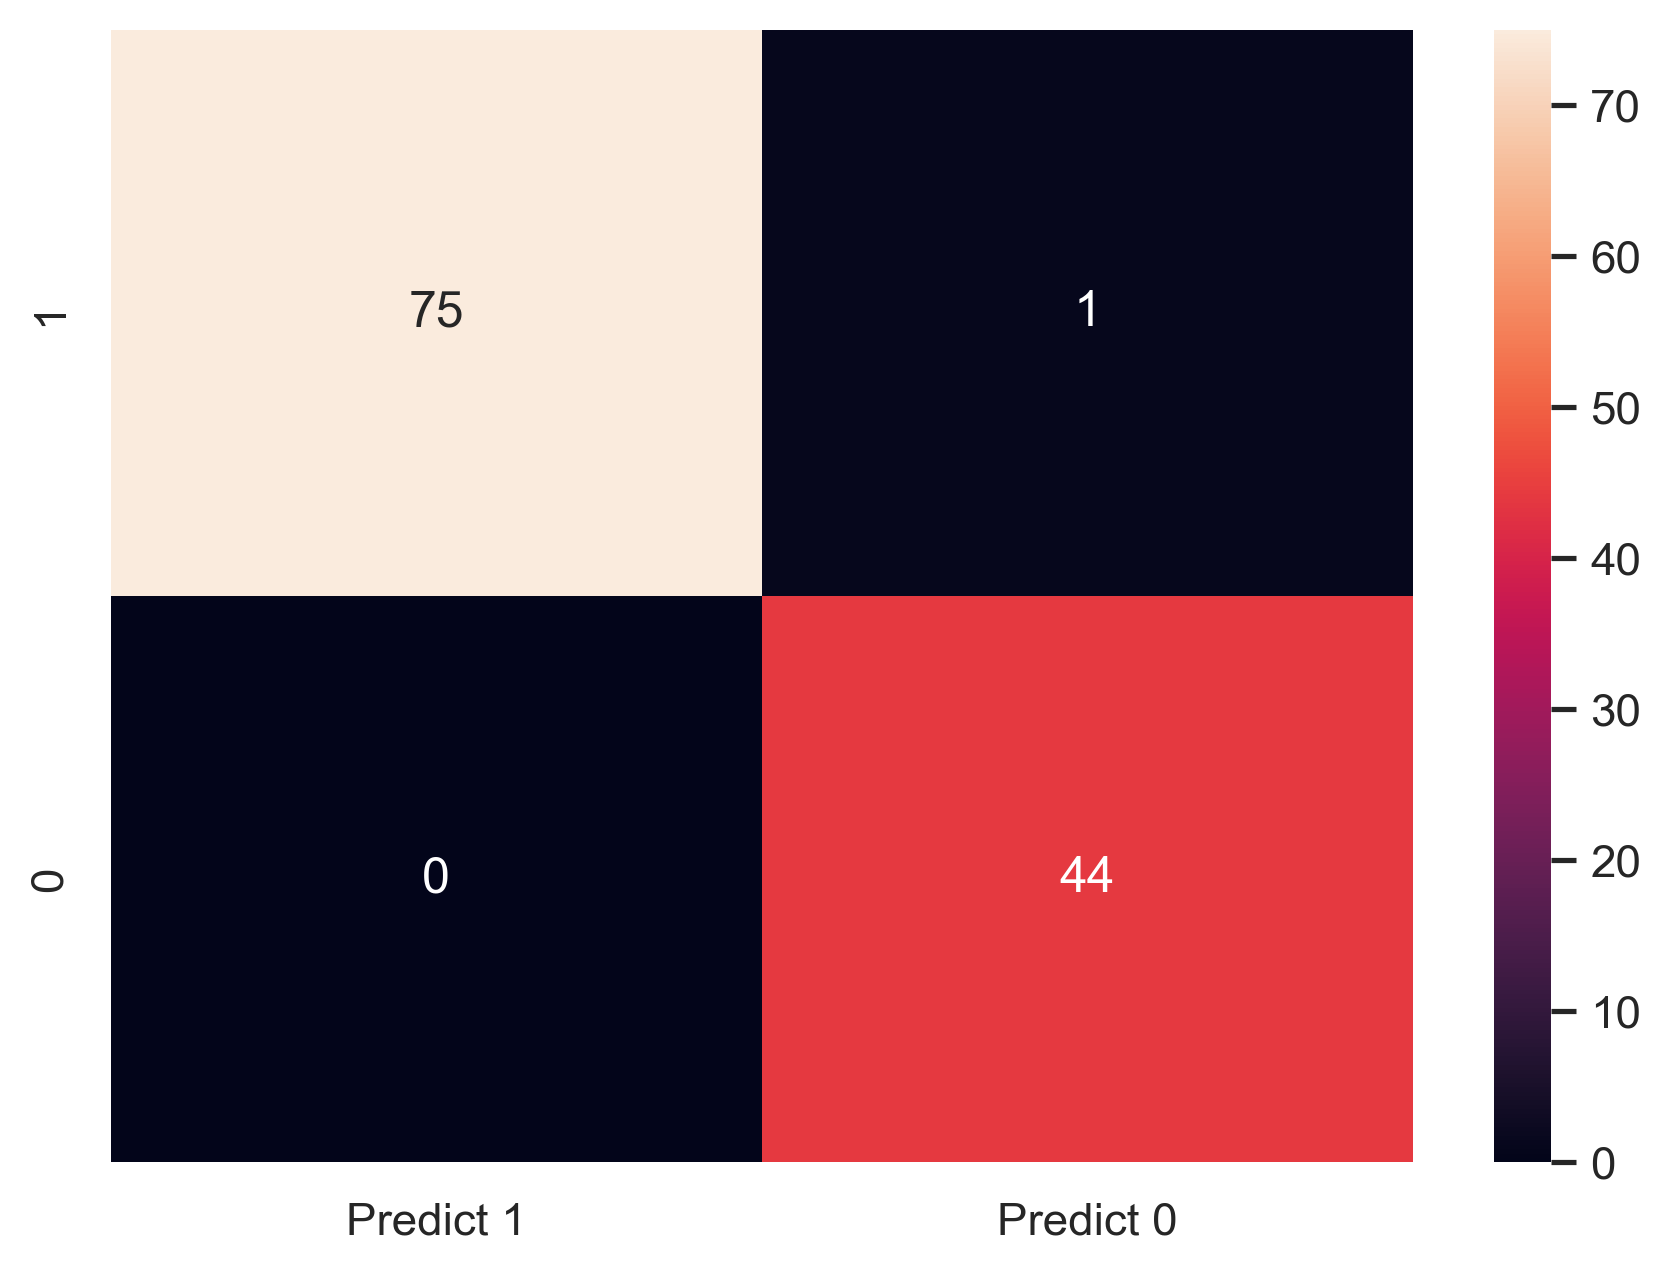

In [67]:
cm = metrics.confusion_matrix(y_test, y_pred_bgcl, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Bagging Model

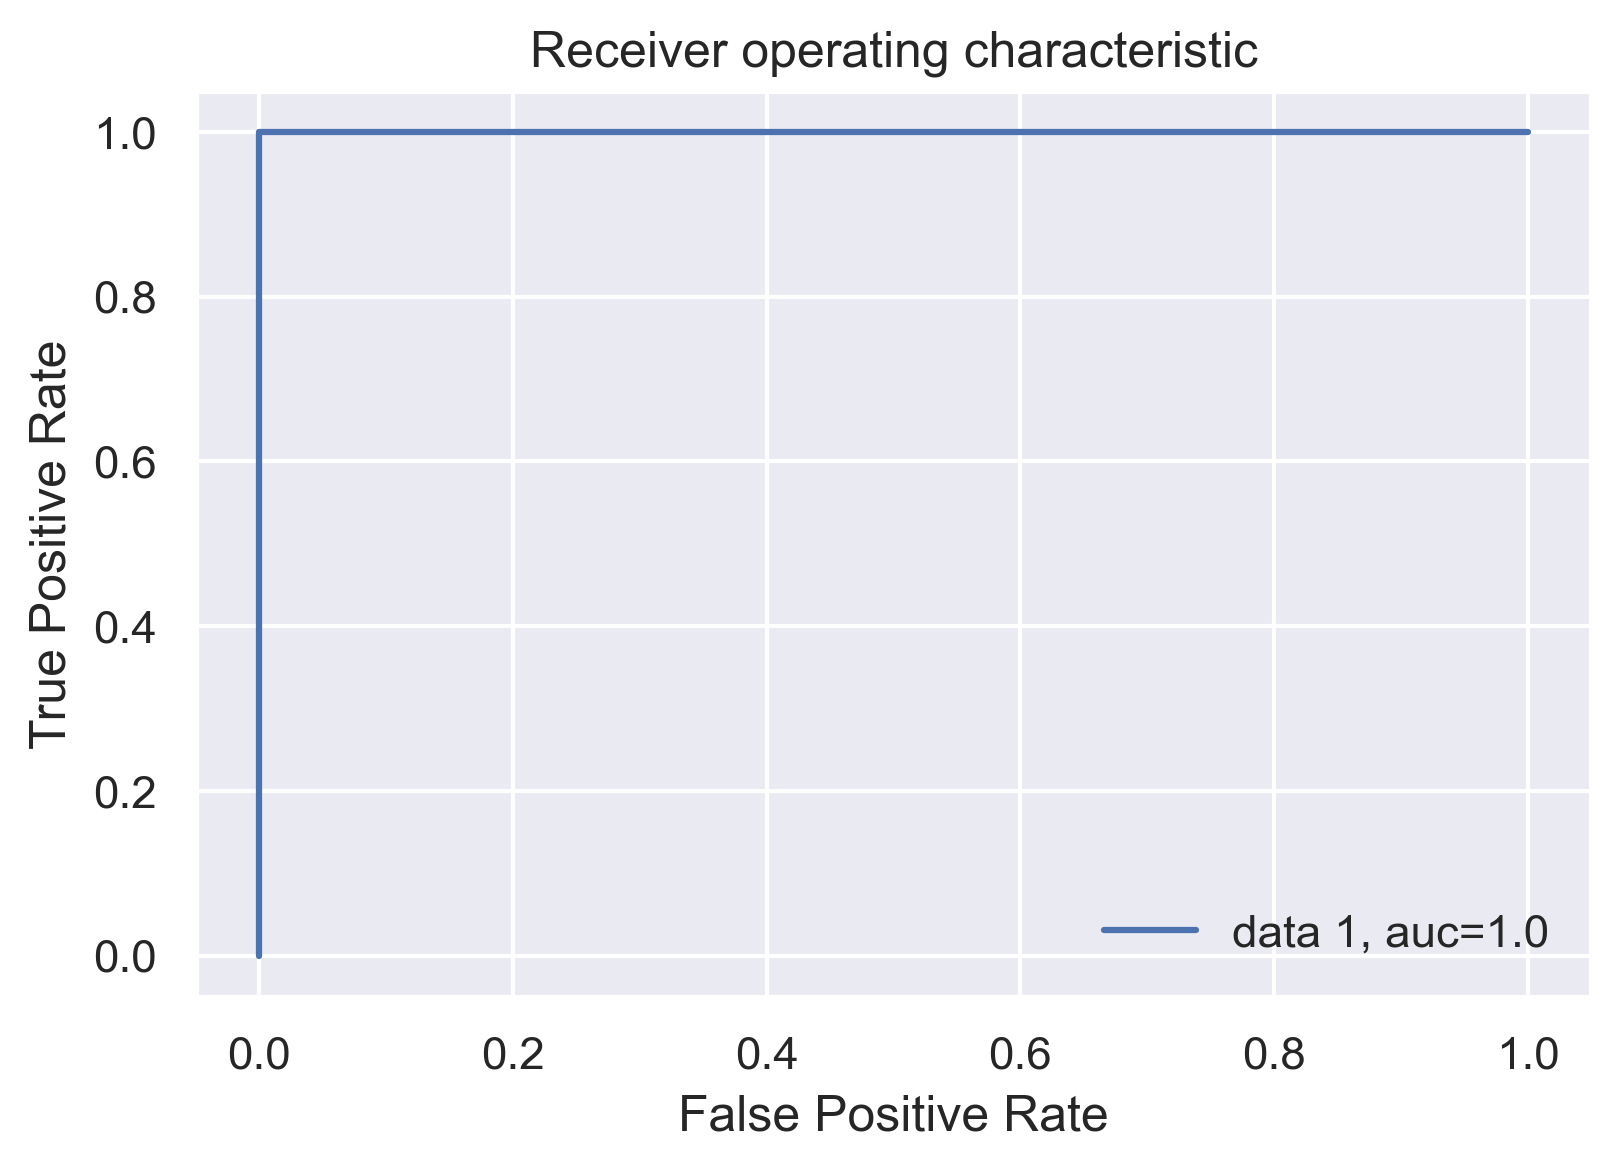

In [68]:
y_pred_proba = bgcl.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## Ensemble learning - AdaBoosting

In [69]:
abcl = AdaBoostClassifier(n_estimators=45, random_state=42)
abcl = abcl.fit(x_train, y_train)
y_pred_ada = abcl.predict(x_test)

print(classification_report(y_test, y_pred_ada))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))
print("Precision:",metrics.precision_score(y_test, y_pred_ada))
print("Recall:",metrics.recall_score(y_test, y_pred_ada))

print("\n")
print(abcl.score(x_train,y_train))
print(abcl.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Accuracy: 0.9916666666666667
Precision: 1.0
Recall: 0.9868421052631579


1.0
0.9916666666666667


### Confusion Matrix AdaBoosting model

<AxesSubplot:>

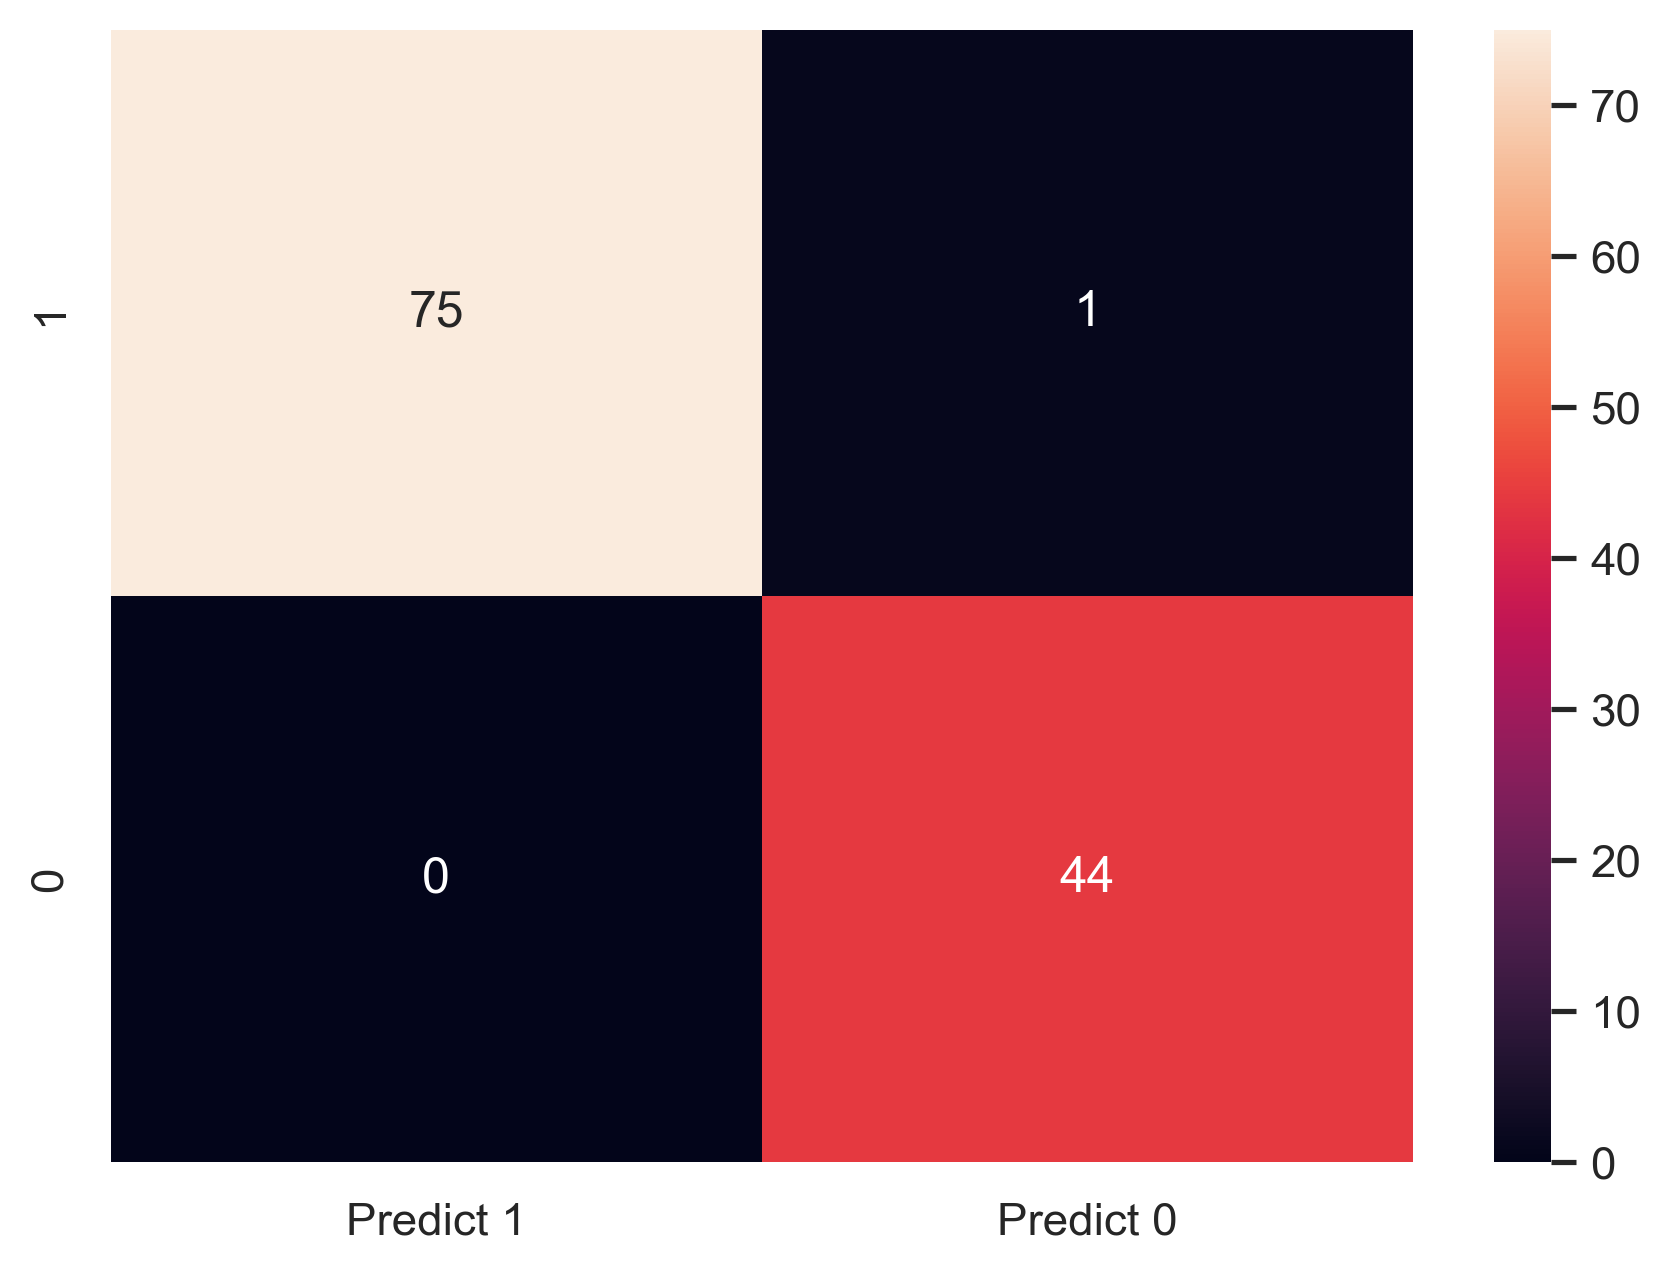

In [70]:
cm = metrics.confusion_matrix(y_test, y_pred_ada, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Adaboosting model

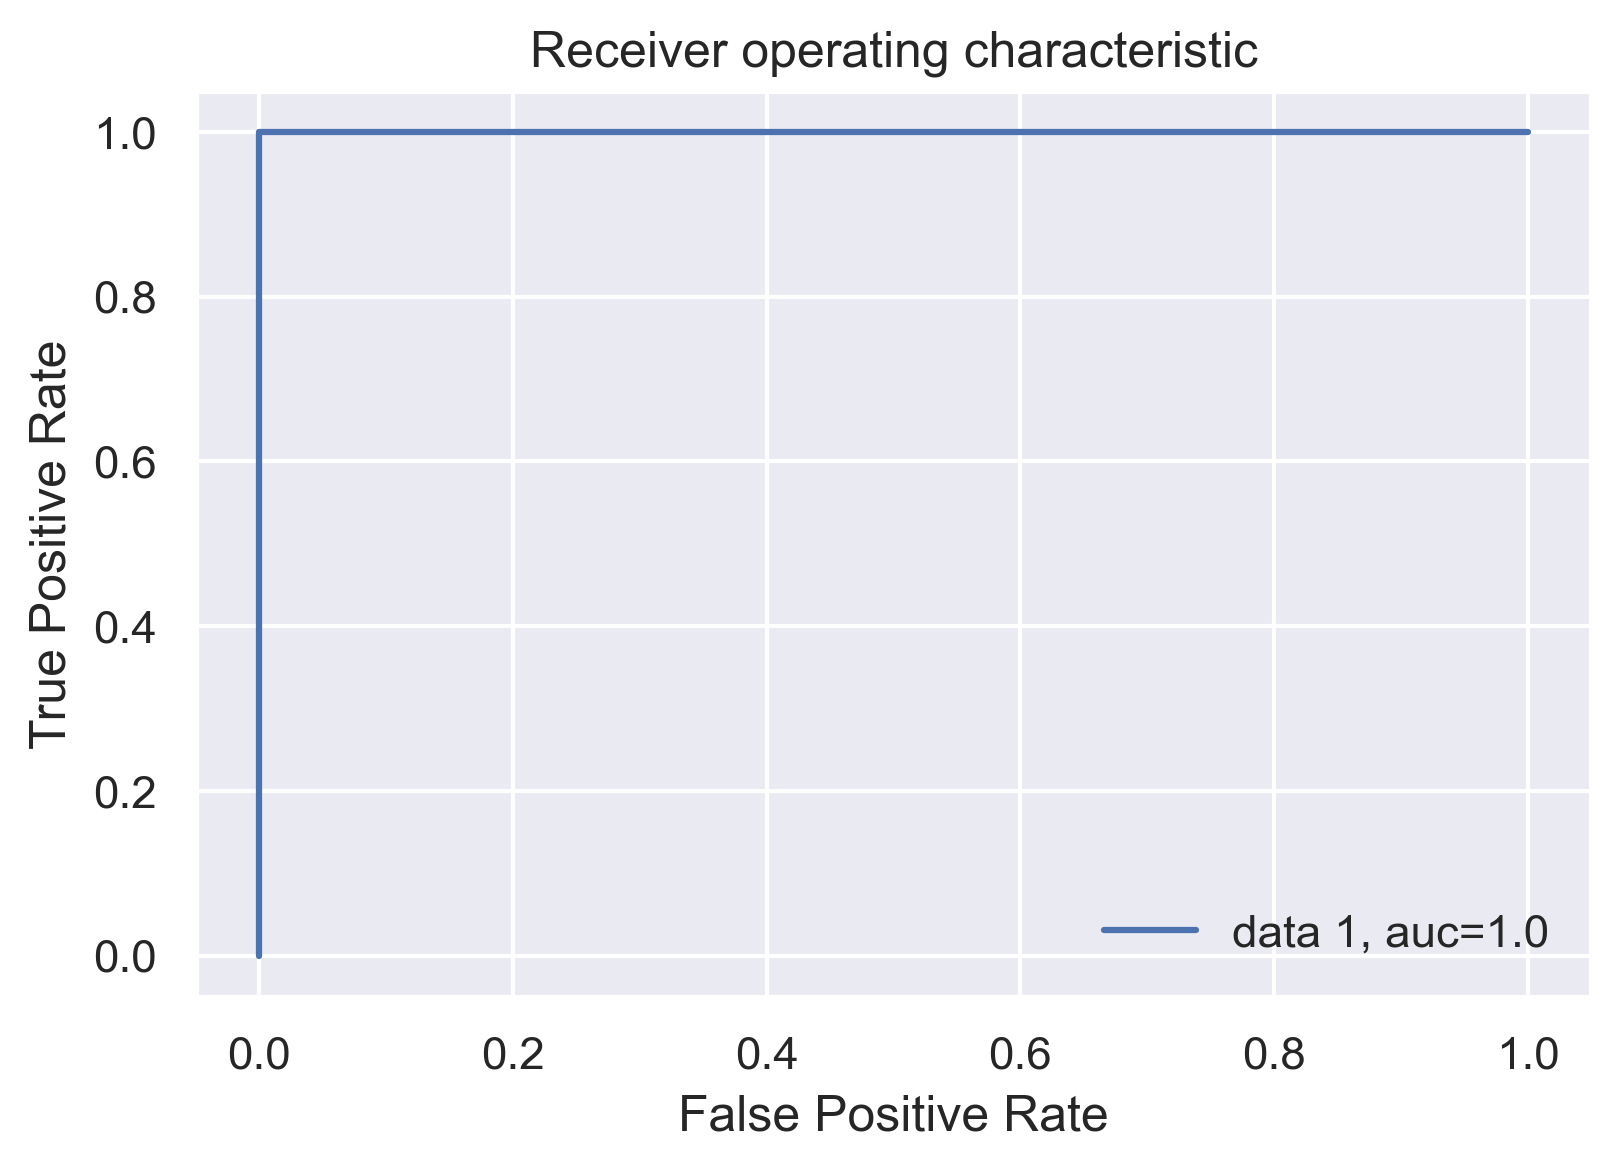

In [71]:
y_pred_proba = abcl.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## Random forest classifier

In [72]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

print(classification_report(y_test, y_pred_rf))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))

print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
1.0
1.0


### Confusion matrix of Random Forest Classifier Model

<AxesSubplot:>

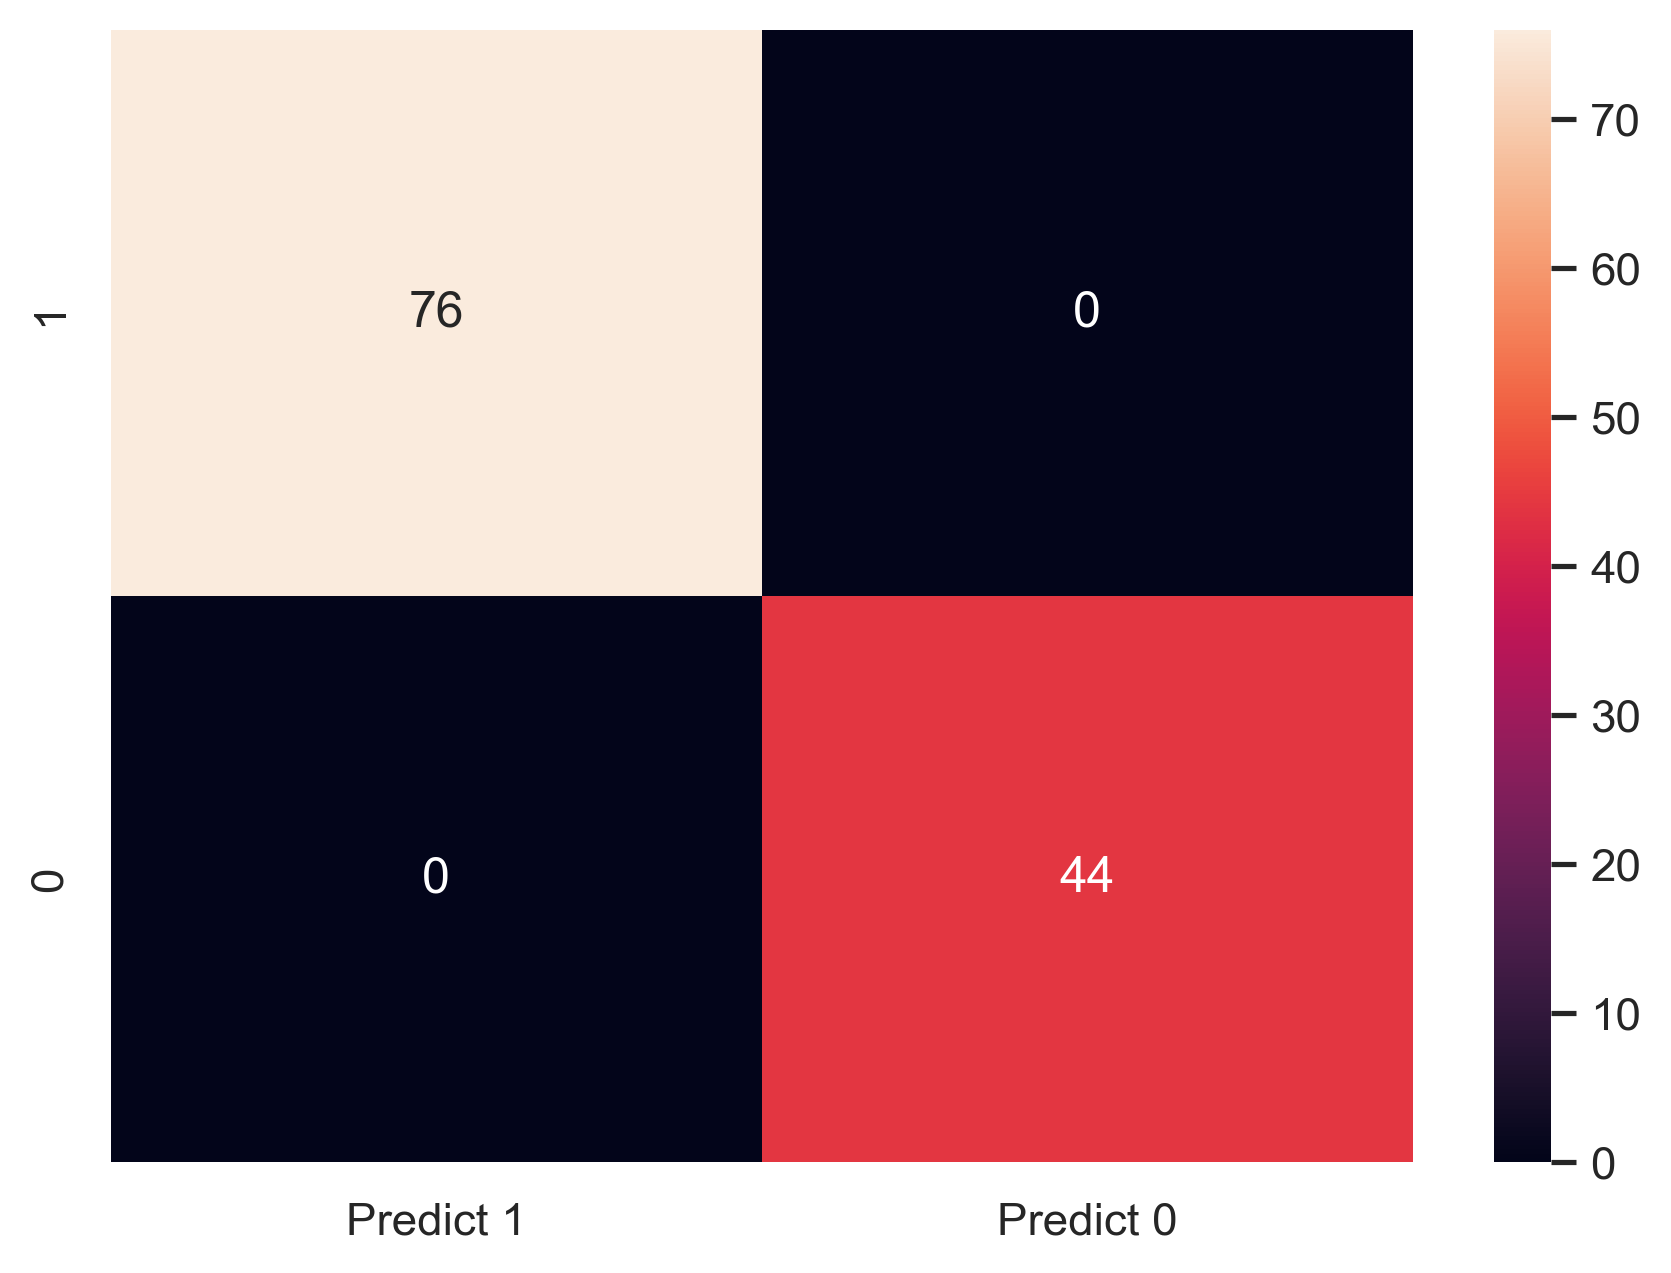

In [73]:
cm = metrics.confusion_matrix(y_test, y_pred_rf, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of Random Forest Classifier Model

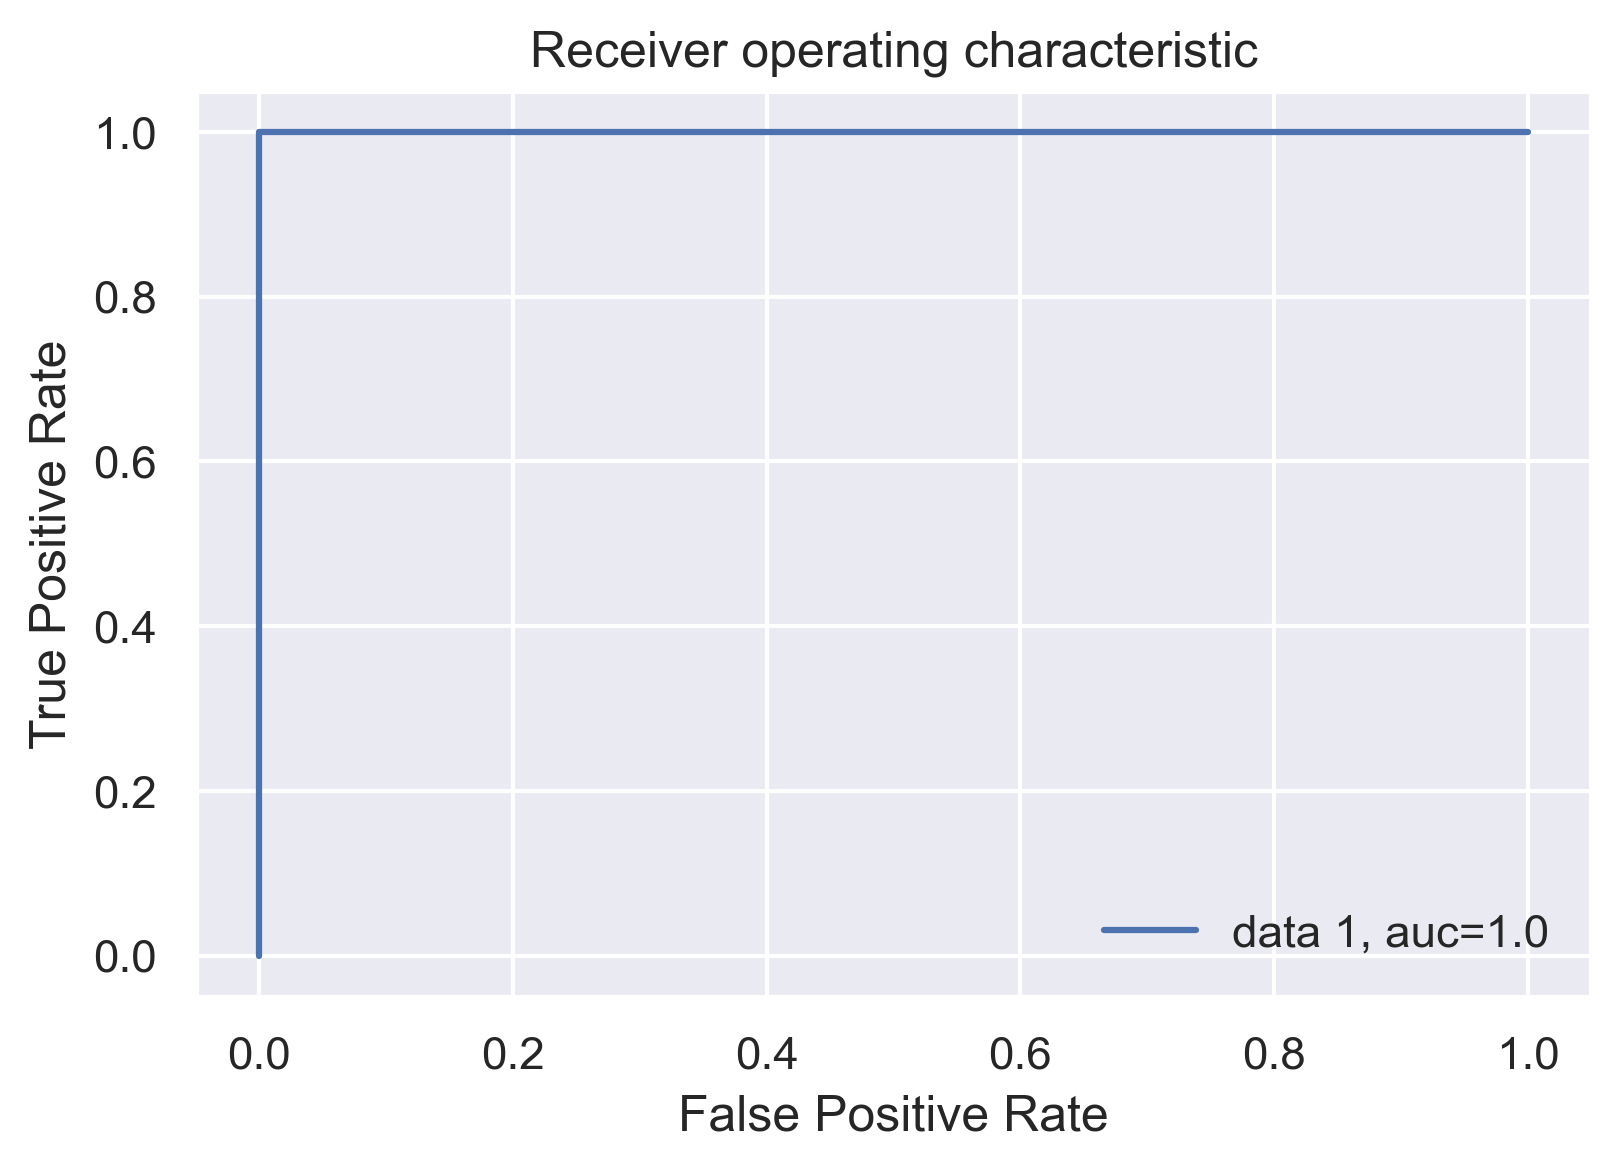

In [74]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## SVM

In [75]:
from sklearn import svm
svm = svm.SVC(gamma=0.025, C=5, probability=True)

svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

print(svm.score(x_train, y_train))
print(svm.score(x_test, y_test))

0.9821428571428571
0.9916666666666667


In [76]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



### Confusion Matrix of SVM

<AxesSubplot:>

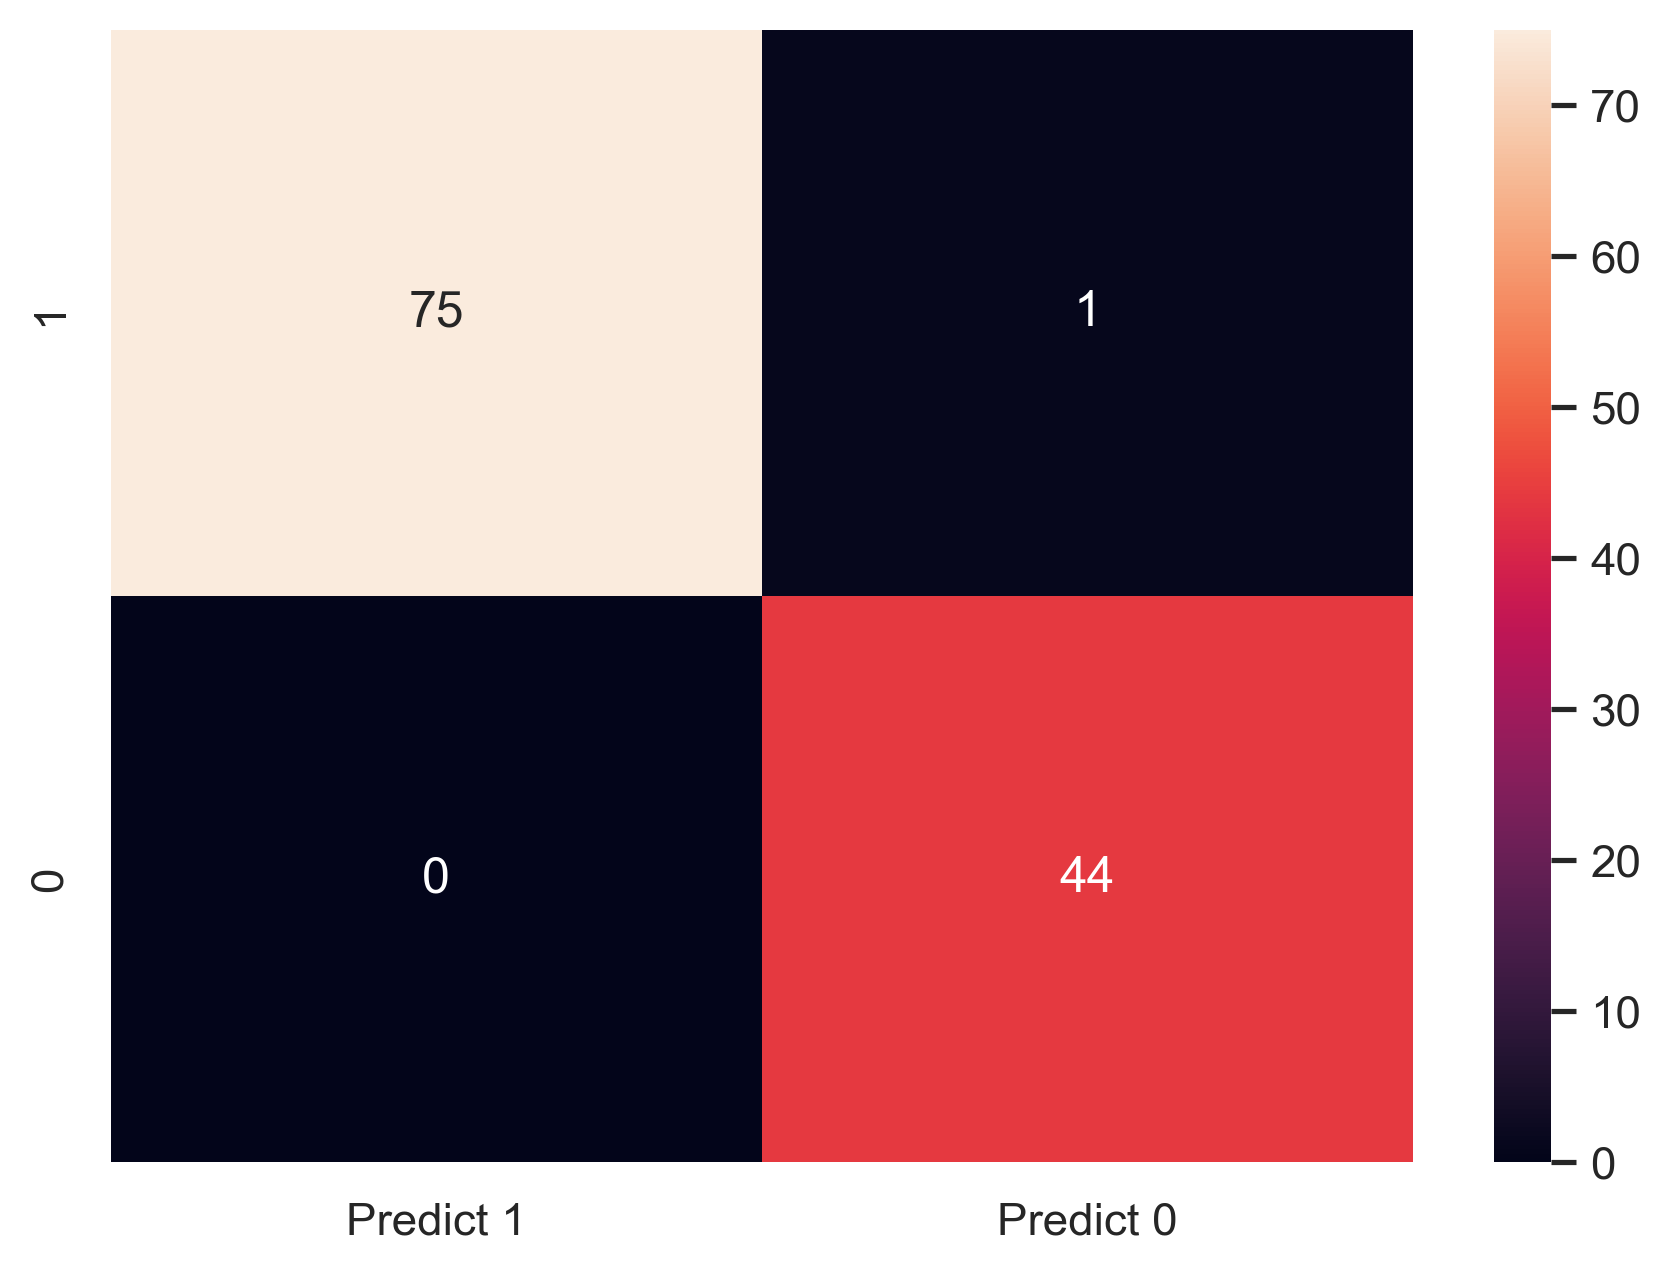

In [77]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

### AUC of SVM

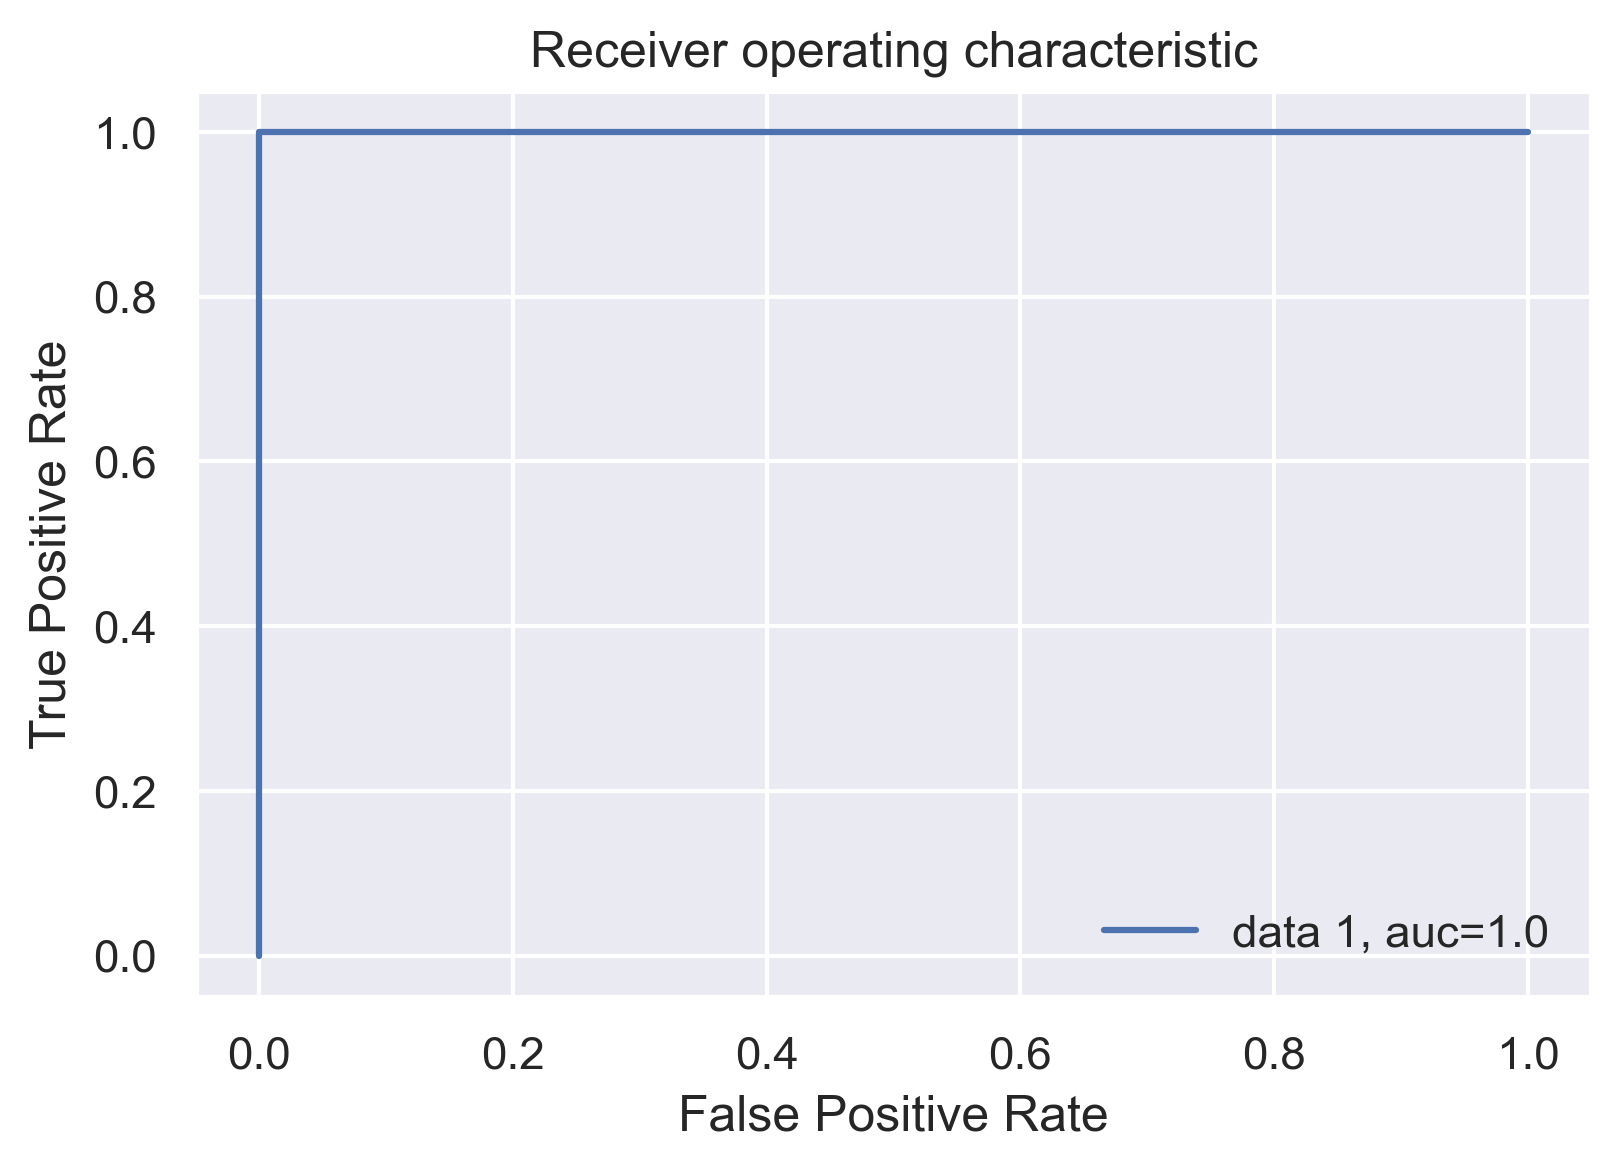

In [78]:
y_pred_proba = svm.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Comparision of all Models

In [79]:
data = {"Model name": ["Logistic Regression","Decision Tree Classifier","Bagging", "AdaBoost", "Random Forest Classifier", "SVM"], "Accuracy(%)": ["99", "99", "99", "99", "100", "99"], "AUC Score": ["1.0","0.993","1.0","1.0","1.0","1.0"]}
Companrison = pd.DataFrame(data)
Companrison

,Model name,Accuracy(%),AUC Score
0,Logistic Regression,99,1.0
1,Decision Tree Classifier,99,0.993
2,Bagging,99,1.0
3,AdaBoost,99,1.0
4,Random Forest Classifier,100,1.0
5,SVM,99,1.0


- **The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.**
- **We can conclude that Random Forest Classifier Model is best for our dataset as it is giving highest AUC score.**

# Building the Prediction System - Random Forest Classifier

In [93]:
#input data and transform into numpy array
in_data= np.asarray(tuple(map(float,input().rstrip().split(','))))

#reshape and scale the input array
in_data_re = in_data.reshape(1,-1)
in_data_sca = scaler.transform(in_data_re)

#print the predicted output for input array
print("Chronic Kidney Disease Detected" if rf.predict(in_data_sca) else "Chronic Kidney Disease Not Detected")

48, 80, 1.020, 1, 0, 1, 1, 0, 0, 121, 36, 1.2, 111, 2.5, 15.4, 44, 7800, 5.2, 1, 1, 0, 1, 0, 0
Chronic Kidney Disease Detected


***Extra data on which you can try our both Prediction System***

Chronic Disease Positive:
- [48, 80, 1.020, 1, 0, 1, 1, 0, 0, 121, 36, 1.2, 111, 2.5, 15.4, 44, 7800, 5.2, 1, 1, 0, 1, 0, 0]
- [7, 50, 1.020, 4, 0, 1, 1, 0, 0, 121, 18, 0.8, 111, 2.5, 11.3, 38, 6000, 5.2, 0, 0, 0, 1, 0, 0]

Chronic Disease Negative:
- [40, 80, 1.025, 0, 0, 1, 1, 0, 0, 140, 10, 1.2, 135, 5, 15, 48, 10400, 4.5, 0, 0, 0, 1, 0, 0]
- [23, 80, 1.025, 0, 0, 1, 1, 0, 0, 70, 36, 1, 150, 4.6, 17, 52, 9800, 5, 0, 0, 0, 1, 0, 0]